In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')

In [3]:
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [6]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [14]:

print("Missing values:\n", df.isnull().sum())

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


if 'date' in df.columns:
    data['date'] = pd.to_datetime(data['date'])


numeric_data = df.select_dtypes(include=['float64', 'int64'])

numeric_data = numeric_data.dropna(axis=1, thresh=len(numeric_data) * 0.5)  # Keep columns with >50% non-NaN values

numeric_data = numeric_data.fillna(numeric_data.median())



Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [11]:
df.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


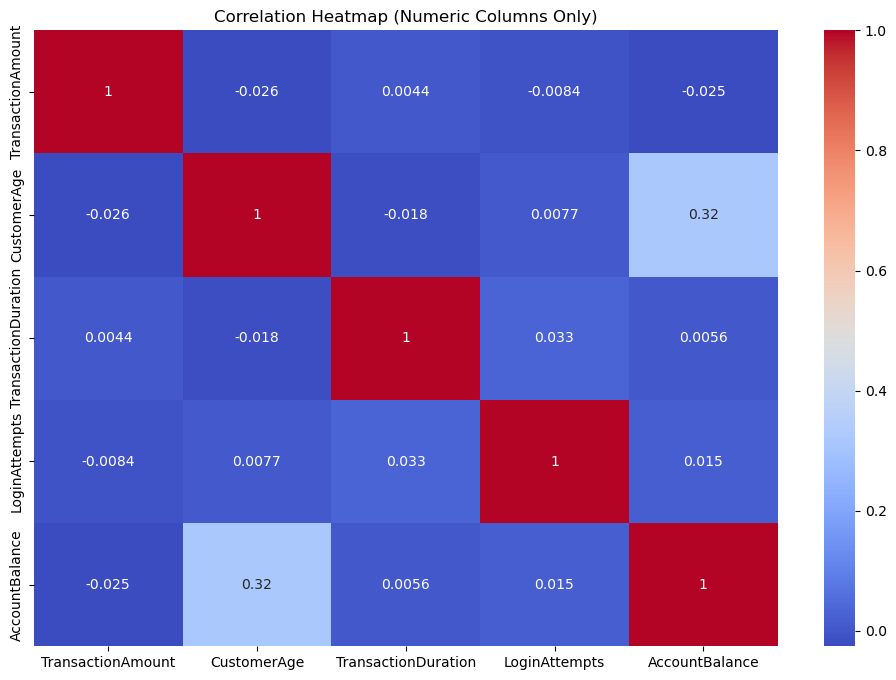

In [15]:
correlation_matrix = numeric_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

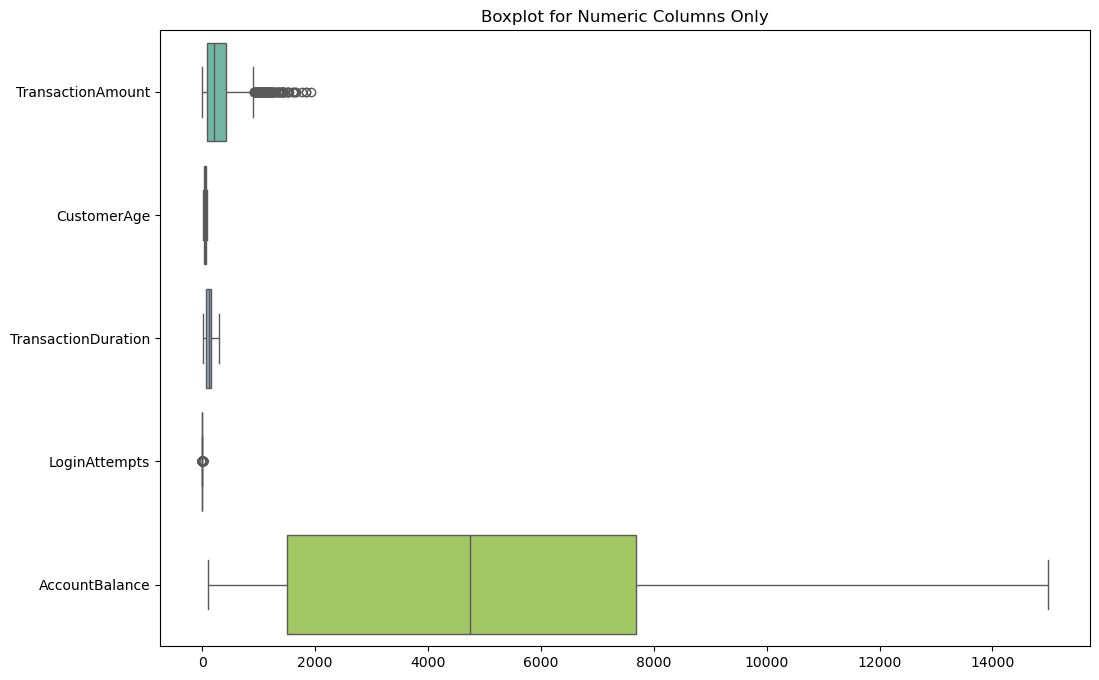

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data, orient="h", palette="Set2")
plt.title('Boxplot for Numeric Columns Only')
plt.show()

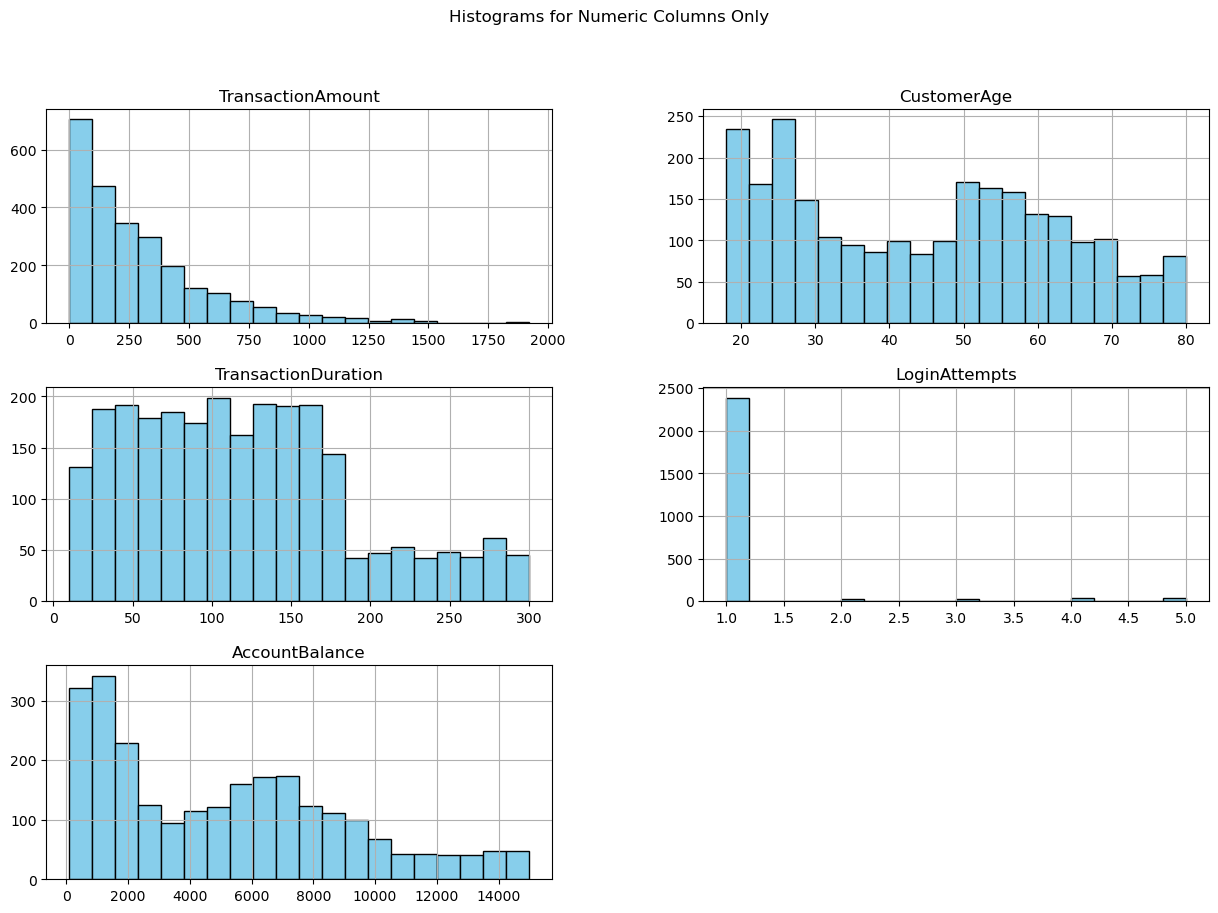

In [17]:
numeric_data.hist(figsize=(15, 10), bins=20, edgecolor='black', color='skyblue')
plt.suptitle('Histograms for Numeric Columns Only')
plt.show()

In [19]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [22]:
categorical_cols , numeric_cols

(Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
        'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
        'CustomerOccupation', 'PreviousTransactionDate'],
       dtype='object'),
 Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
        'LoginAttempts', 'AccountBalance'],
       dtype='object'))

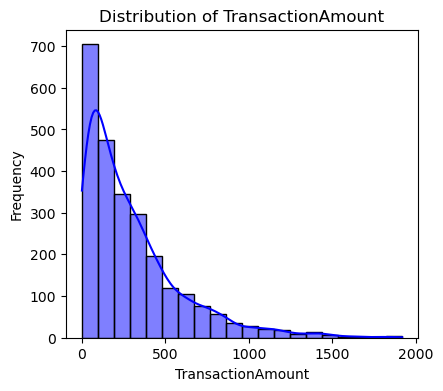

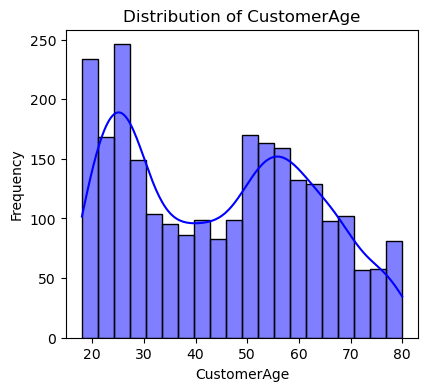

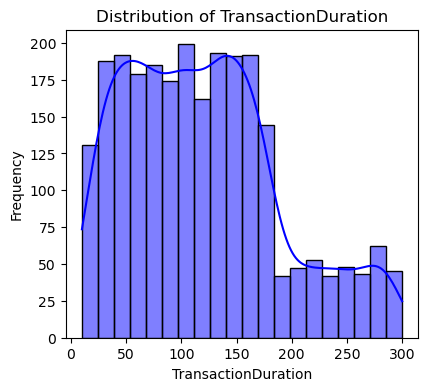

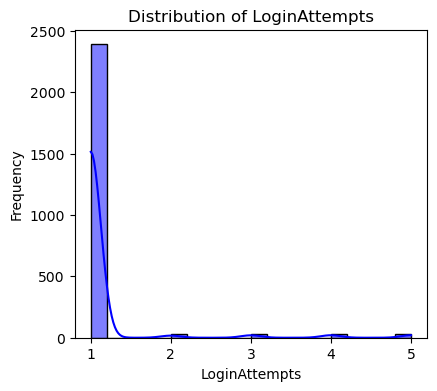

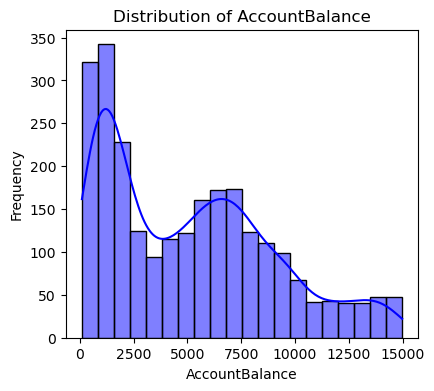

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [38]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

IndentationError: unexpected indent (2902944763.py, line 5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\427209688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Location'], order=df['Location'].value_counts().index, palette='viridis')


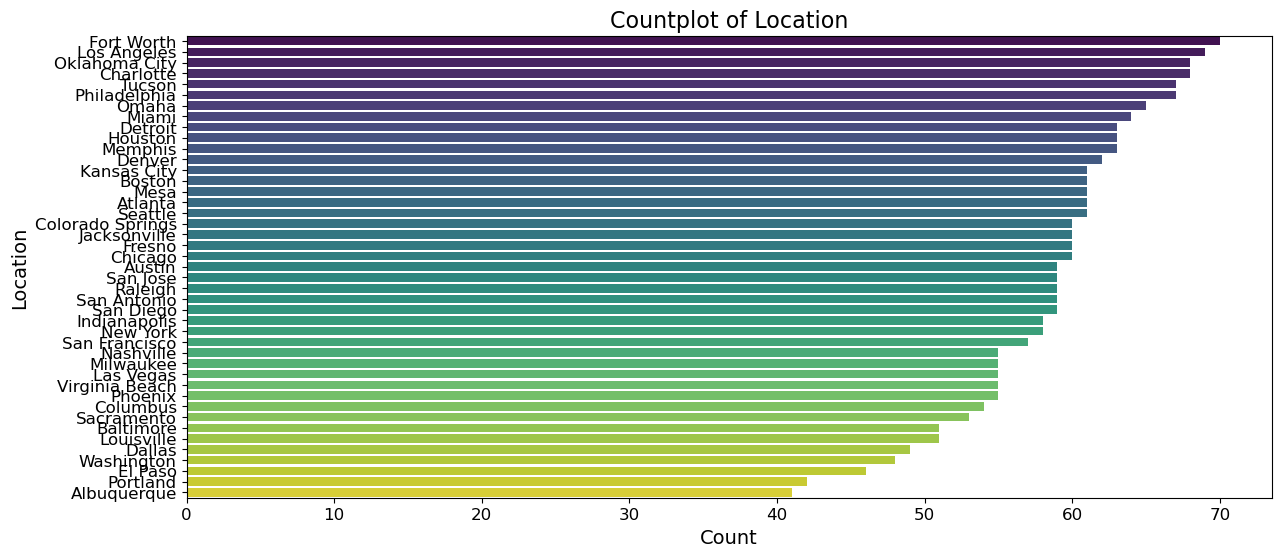

In [41]:
plt.figure(figsize=(14, 6))
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index, palette='viridis')
plt.title('Countplot of Location', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


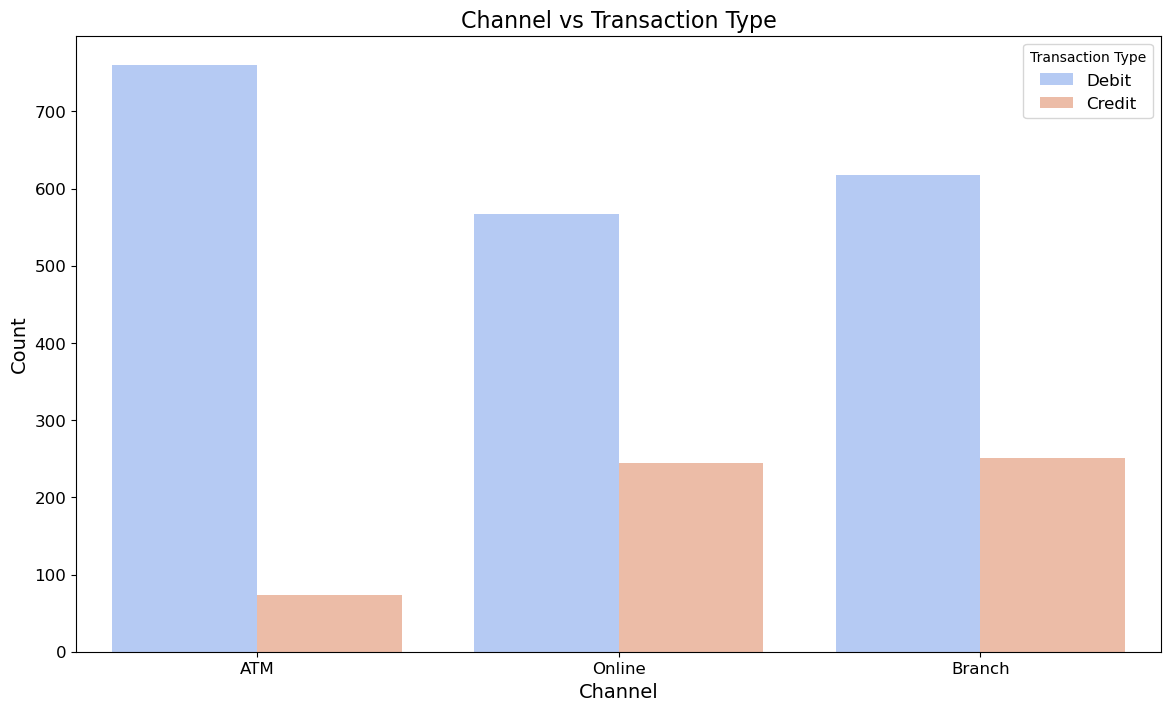

In [43]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Channel', hue='TransactionType', data=df, palette='coolwarm')
plt.title('Channel vs Transaction Type', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Transaction Type', fontsize=12)
plt.show()

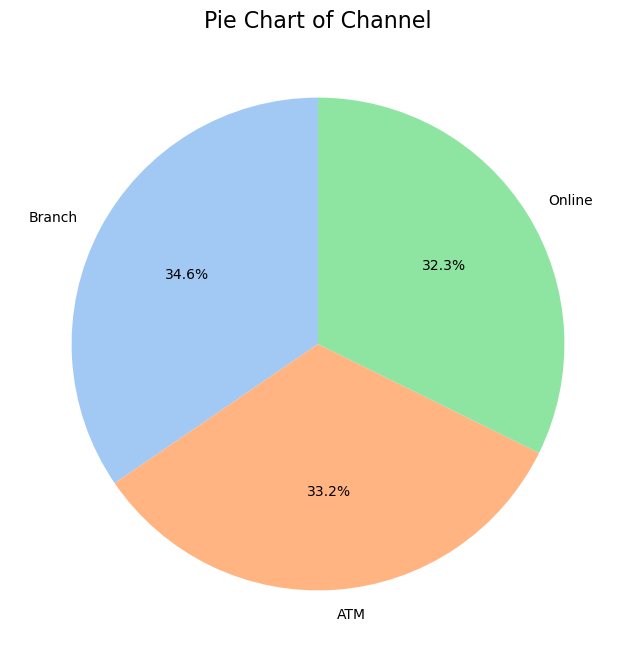

In [45]:
# Pie chart for 'Channel'
plt.figure(figsize=(8, 8))
df['Channel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Channel', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

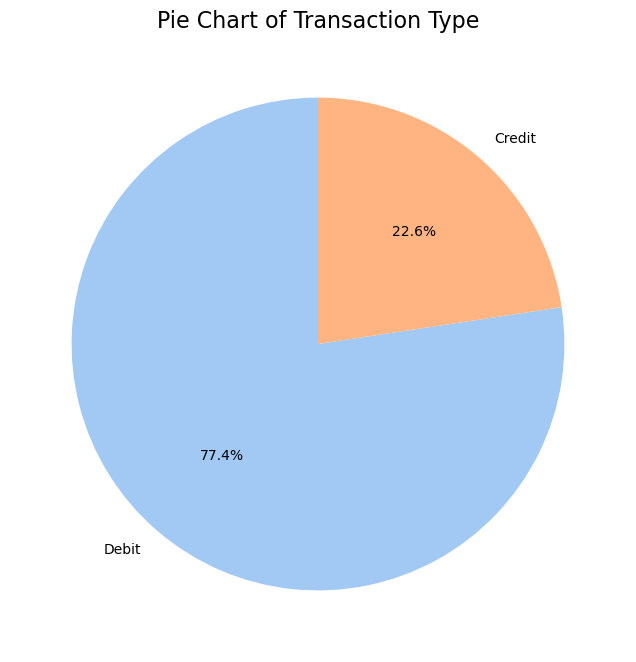

In [47]:
# Pie chart for 'TransactionType'
plt.figure(figsize=(8, 8))
df['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Transaction Type', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\1104533057.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CustomerOccupation', y='CustomerAge', data=df, estimator='mean', palette='muted', ci=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\1104533057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerOccupation', y='CustomerAge', data=df, estimator='mean', palette='muted', ci=None)


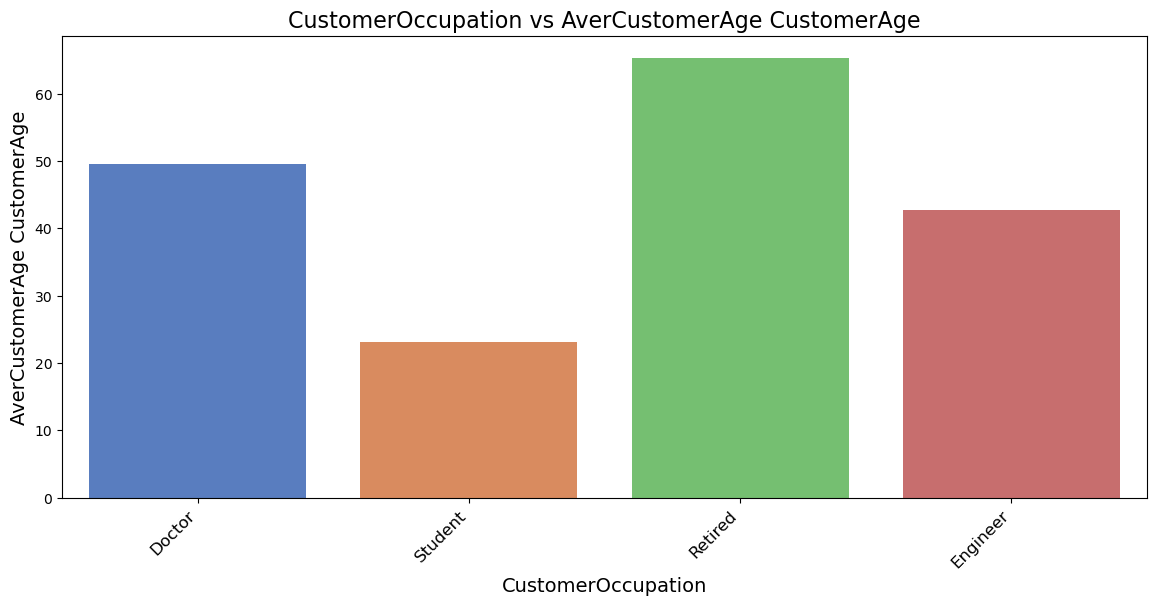

In [49]:
# Bar graph and pie chart for 'CustomerOccupation' with respect to 'CustomerAge'
plt.figure(figsize=(14, 6))
sns.barplot(x='CustomerOccupation', y='CustomerAge', data=df, estimator='mean', palette='muted', ci=None)
plt.title('CustomerOccupation vs AverCustomerAge CustomerAge', fontsize=16)
plt.xlabel('CustomerOccupation', fontsize=14)
plt.ylabel('AverCustomerAge CustomerAge', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.show()

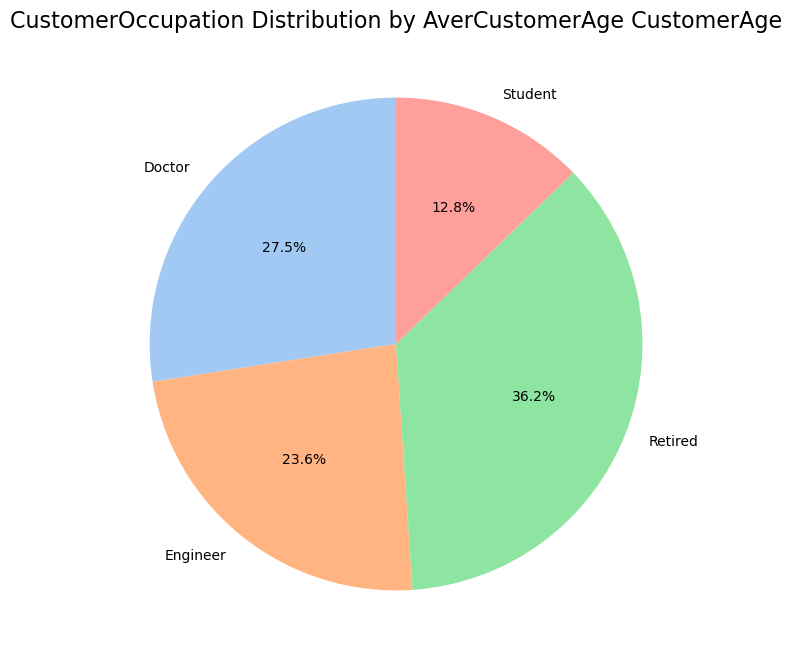

In [51]:
# Pie chart for 'CustomerOccupation' with respect to 'CustomerAge'
plt.figure(figsize=(8, 8))
df.groupby('CustomerOccupation')['CustomerAge'].mean().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('CustomerOccupation Distribution by AverCustomerAge CustomerAge', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

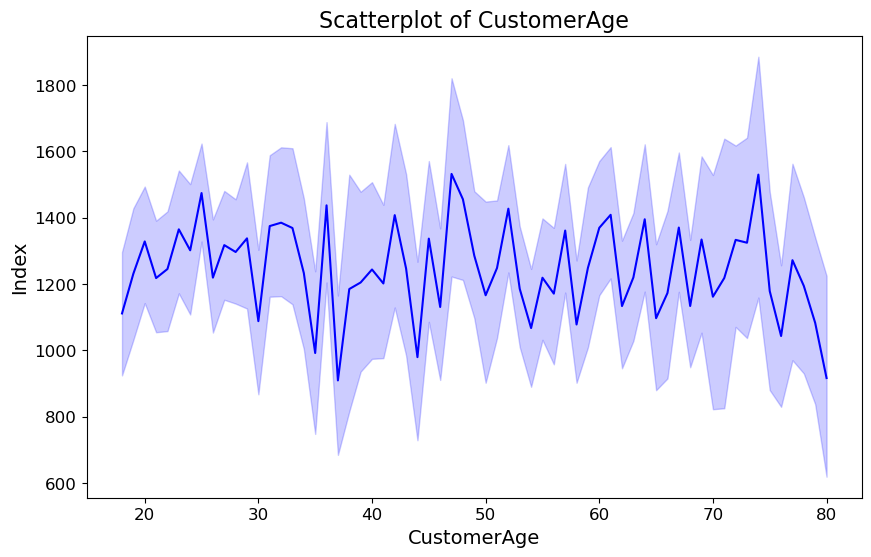

In [54]:
# Scatterplot for 'CustomerAge'
plt.figure(figsize=(10, 6))
sns.lineplot(y=df.index, x=df['CustomerAge'], color='blue')
plt.title('Scatterplot of CustomerAge', fontsize=16)
plt.ylabel('Index', fontsize=14)
plt.xlabel('CustomerAge', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\963840655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df['MerchantID'].isin(top_20_merchants)]['MerchantID'], order=top_20_merchants, palette='cool')


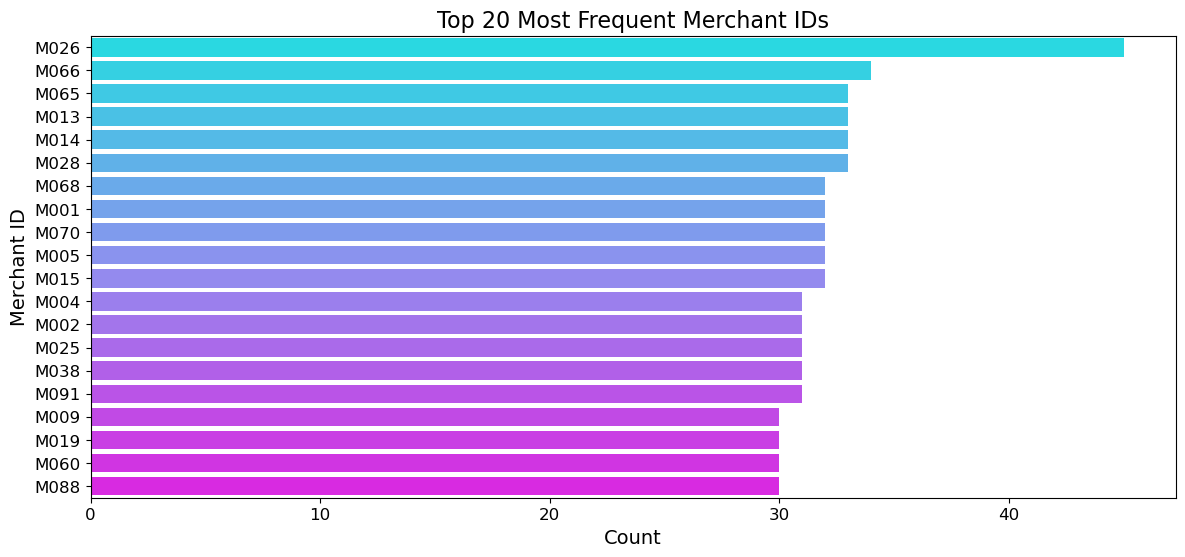

In [56]:

# Countplot for top 20 most frequent 'MerchantID'
top_20_merchants = df['MerchantID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=df[df['MerchantID'].isin(top_20_merchants)]['MerchantID'], order=top_20_merchants, palette='cool')
plt.title('Top 20 Most Frequent Merchant IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Merchant ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\1735116792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df['AccountID'].isin(top_20_accounts)]['AccountID'], order=top_20_accounts, palette='cool')


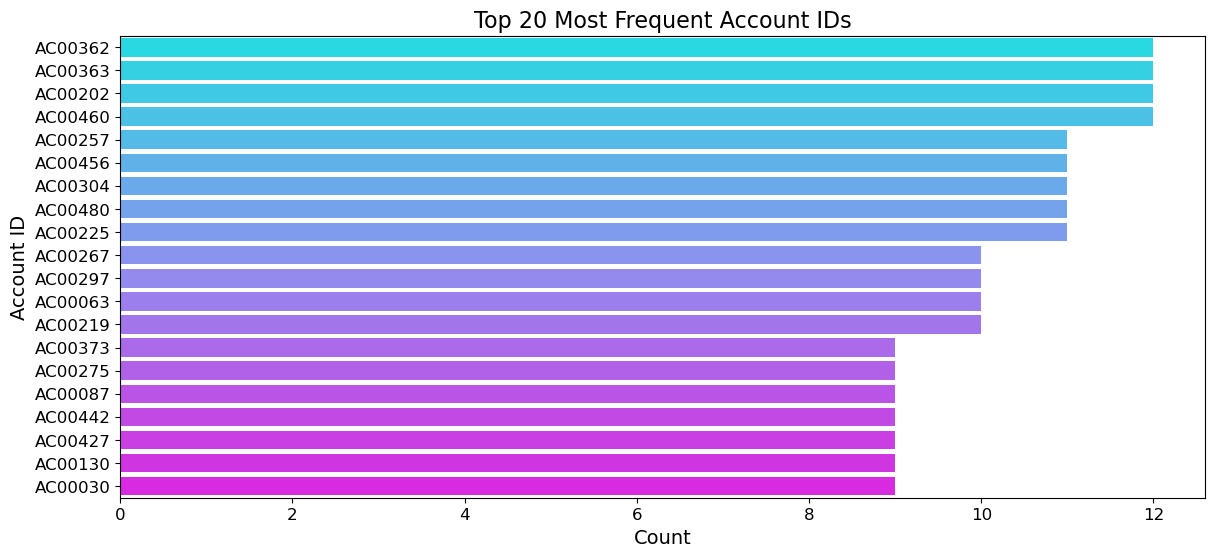

In [58]:
# Countplot for top 20 most frequent 'AccountID'
top_20_accounts = df['AccountID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=df[df['AccountID'].isin(top_20_accounts)]['AccountID'], order=top_20_accounts, palette='cool')
plt.title('Top 20 Most Frequent Account IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Account ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

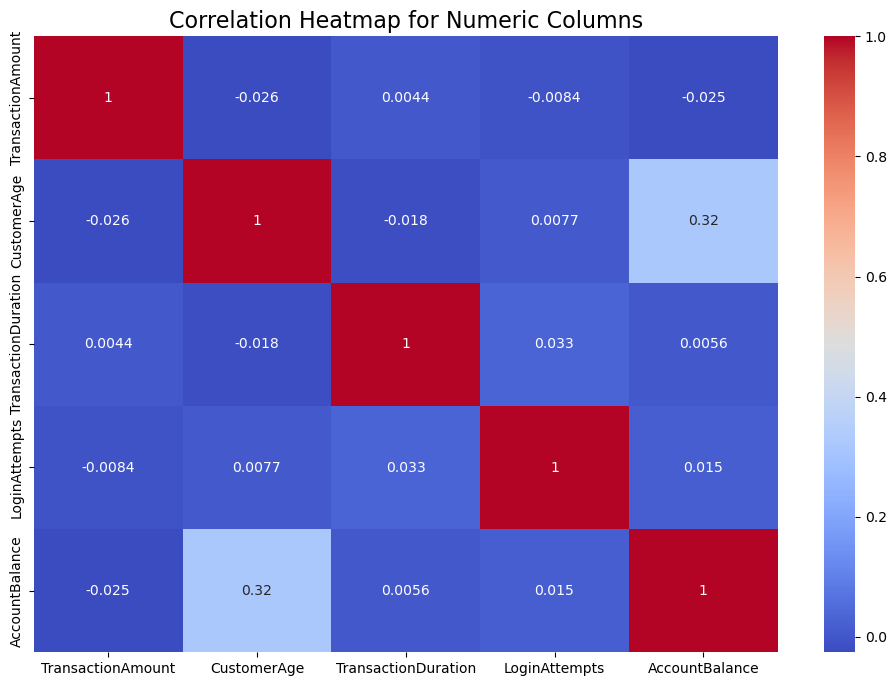

In [59]:
# Define numeric and categorical columns
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# 1. Correlation Heatmap for Numeric Columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns', fontsize=16)
plt.show()


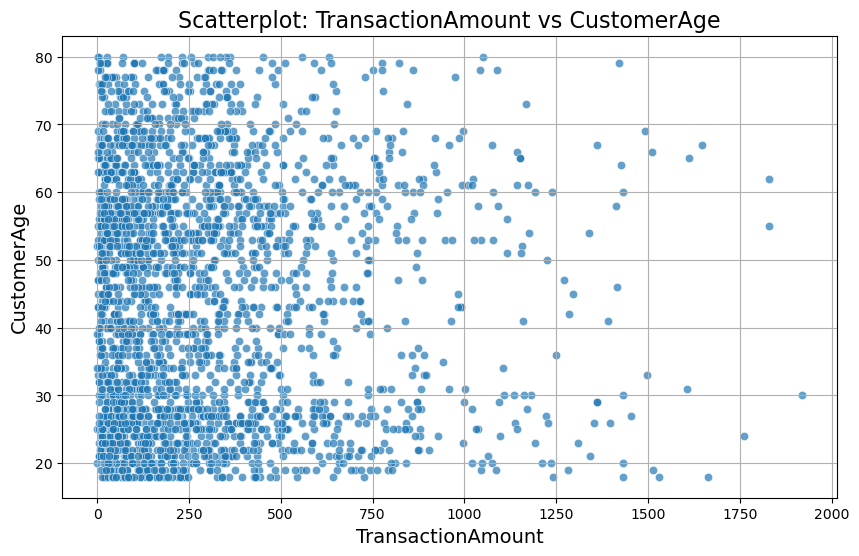

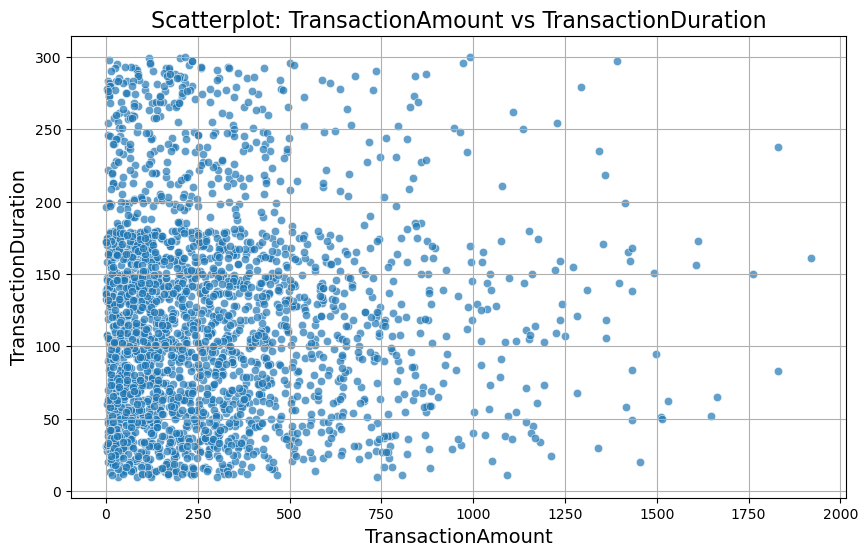

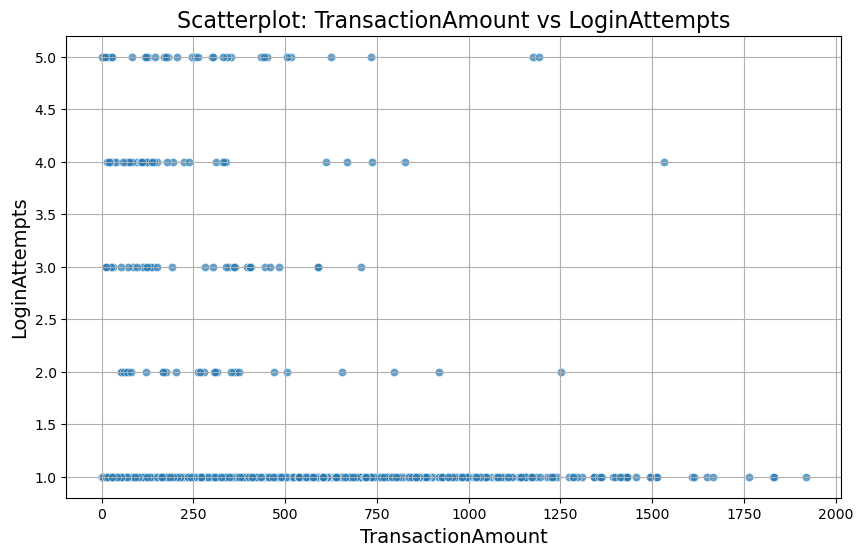

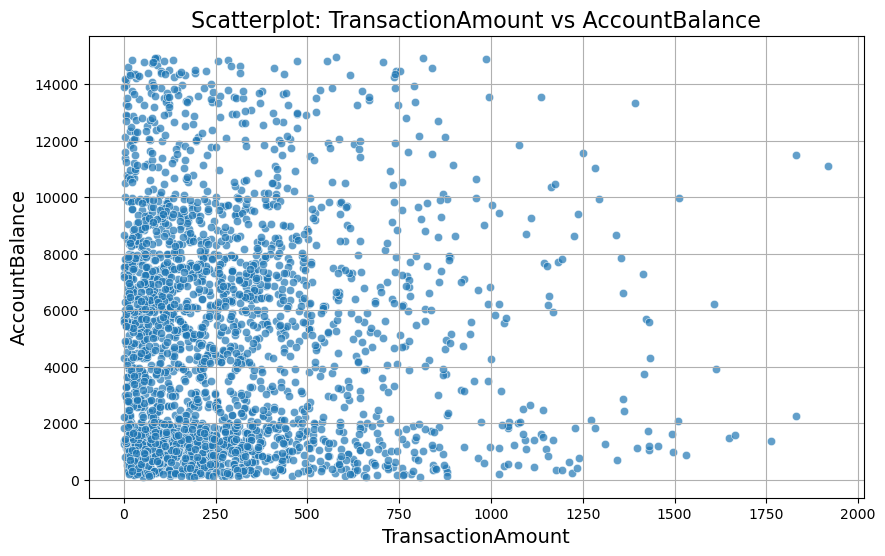

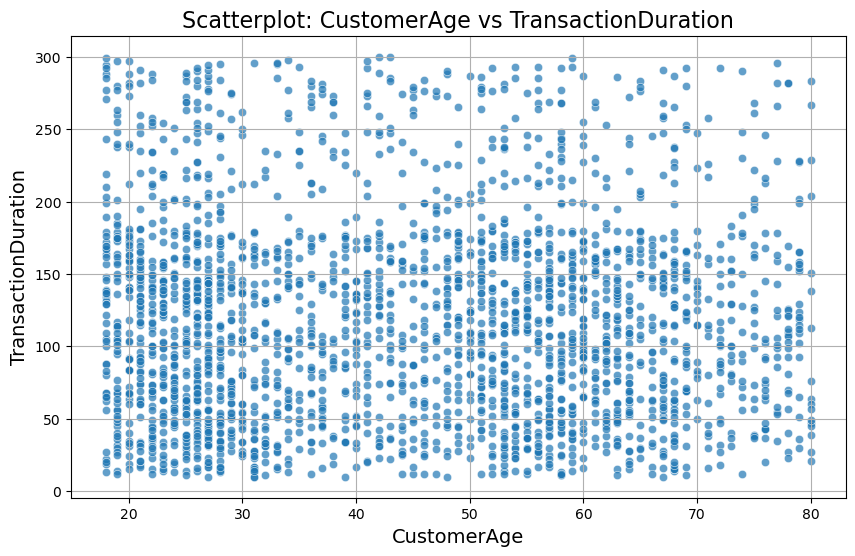

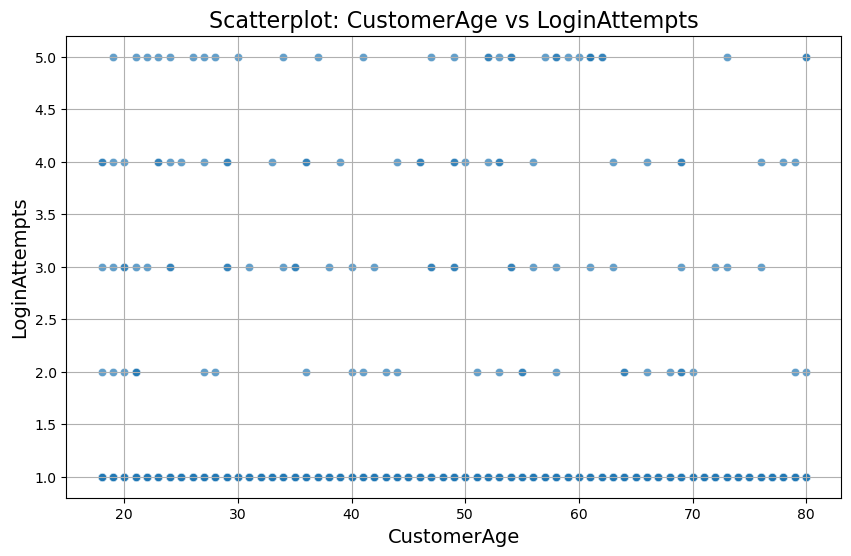

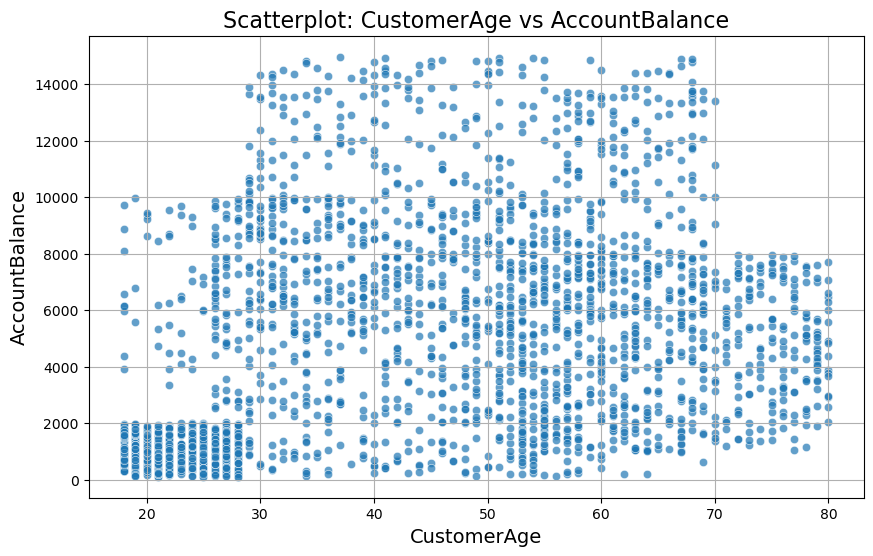

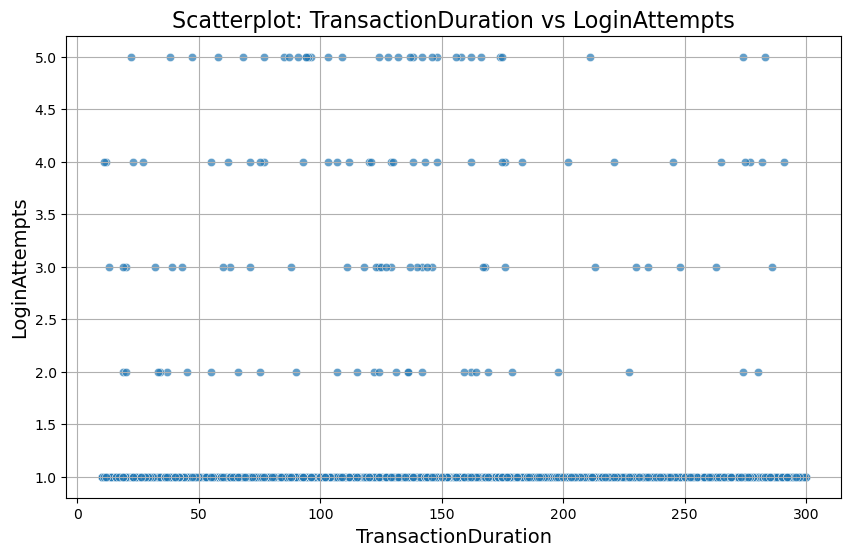

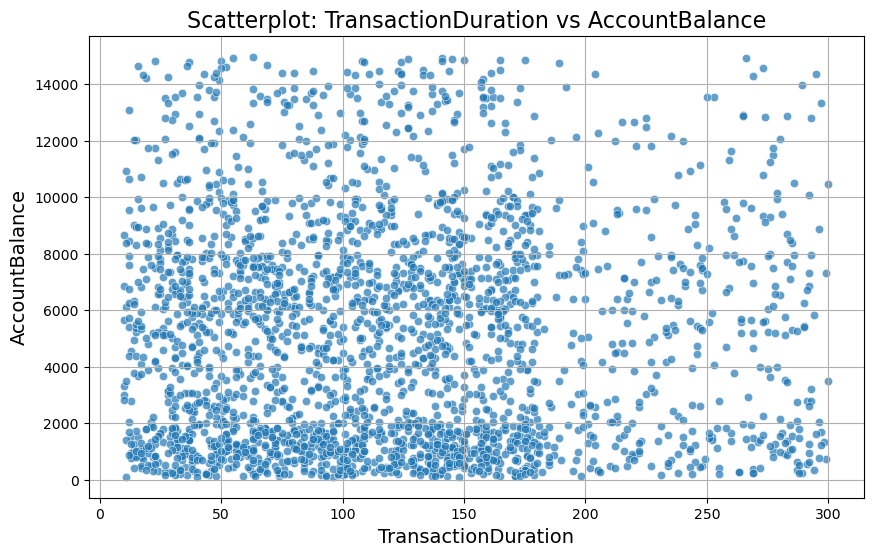

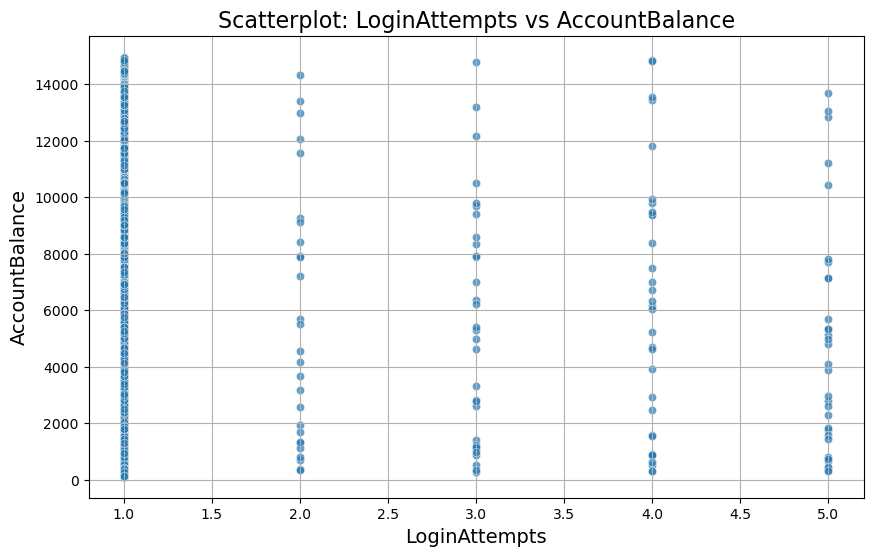

In [61]:
# 2. Scatterplots for Numeric vs Numeric
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col1], y=df[col2], alpha=0.7)
        plt.title(f'Scatterplot: {col1} vs {col2}', fontsize=16)
        plt.xlabel(col1, fontsize=14)
        plt.ylabel(col2, fontsize=14)
        plt.grid(True)
        plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


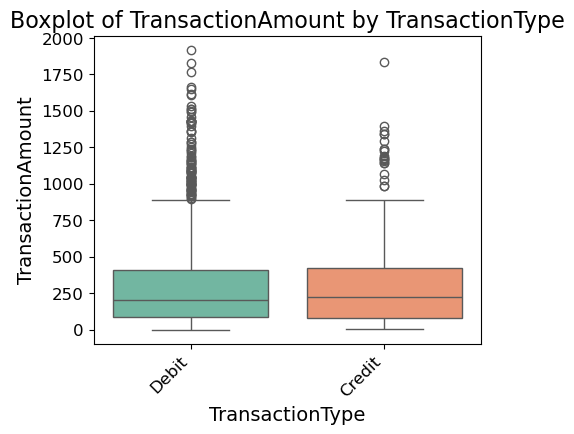

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


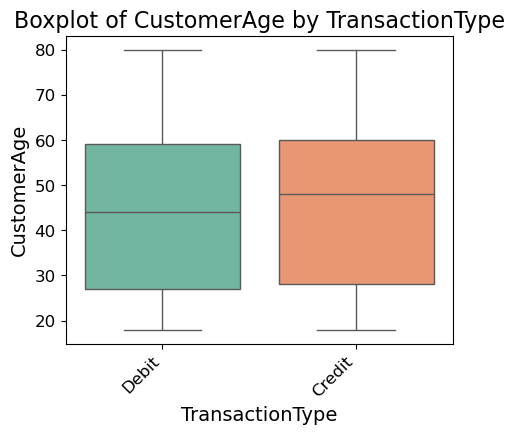

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


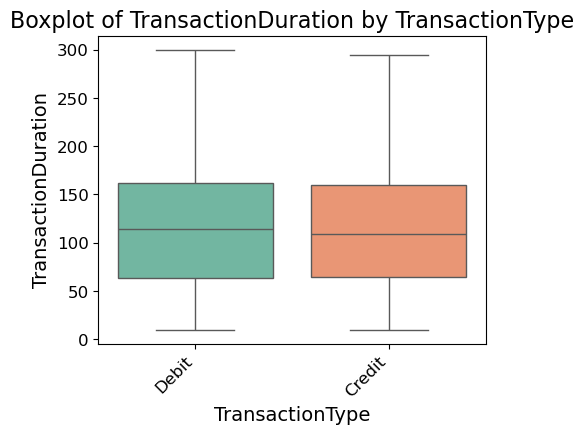

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


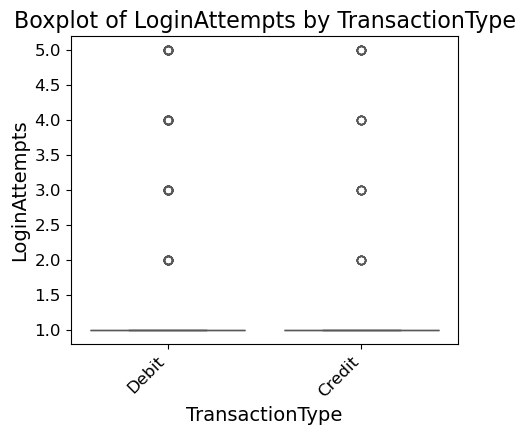

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


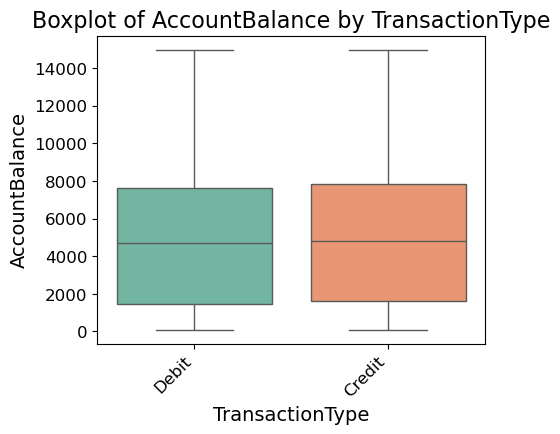

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


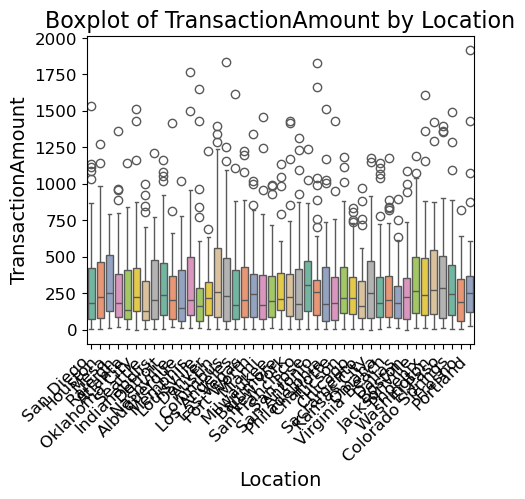

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


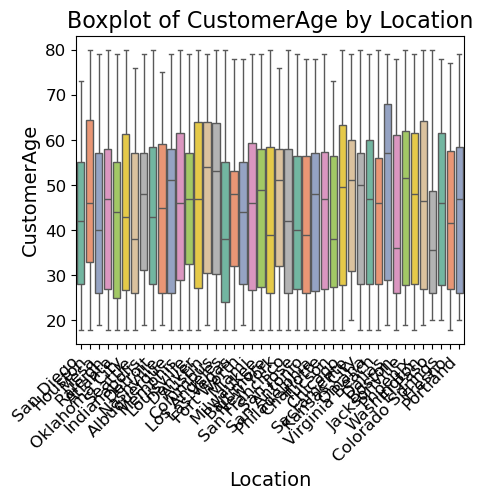

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


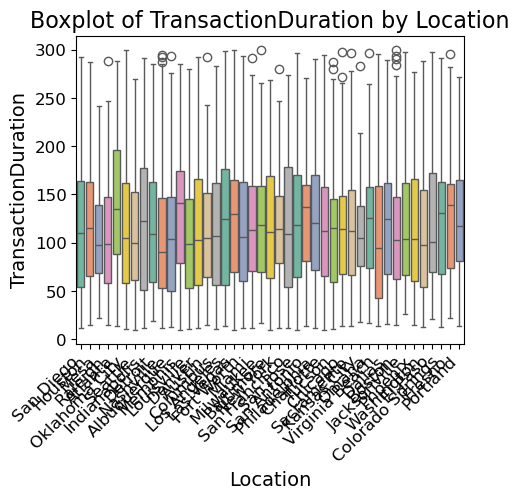

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


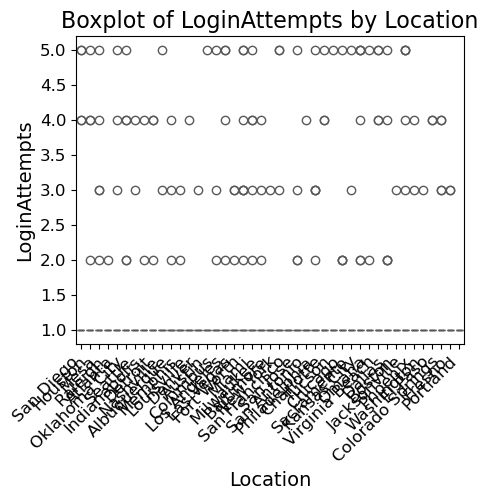

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


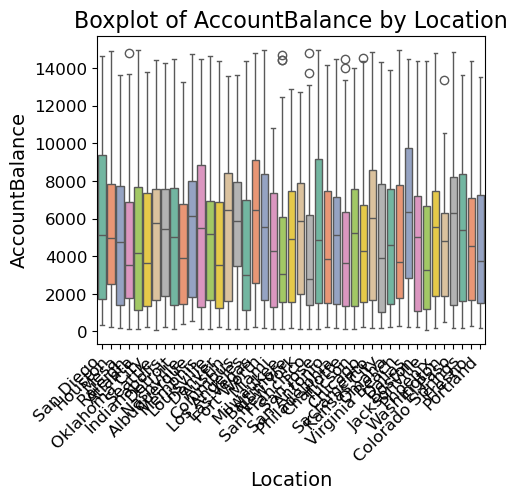

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


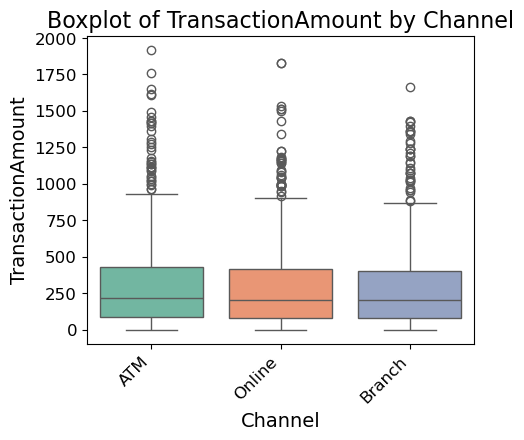

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


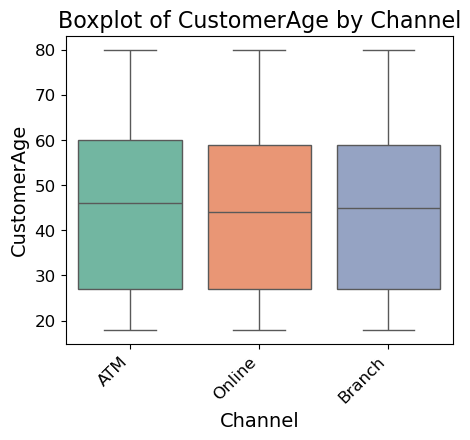

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


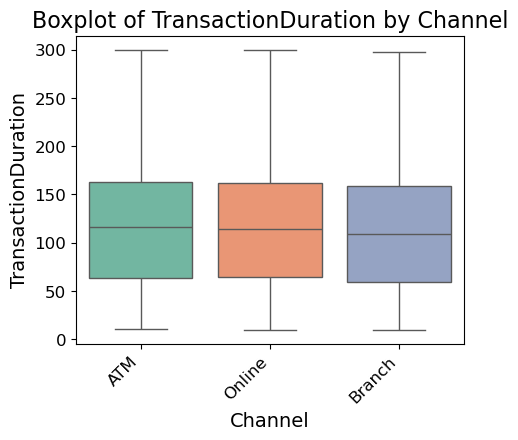

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


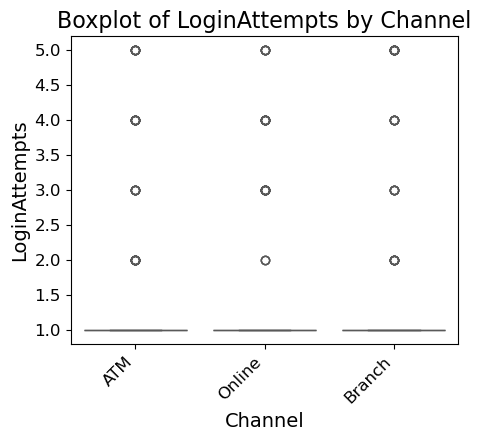

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


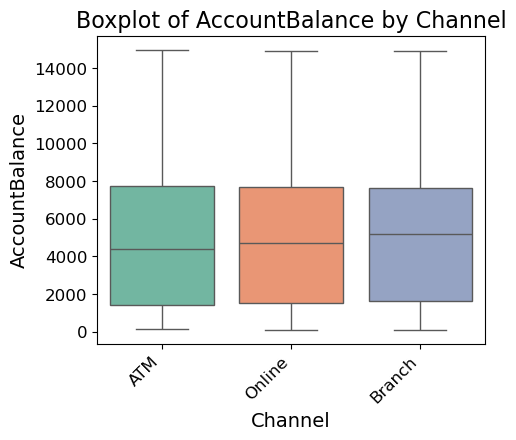

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


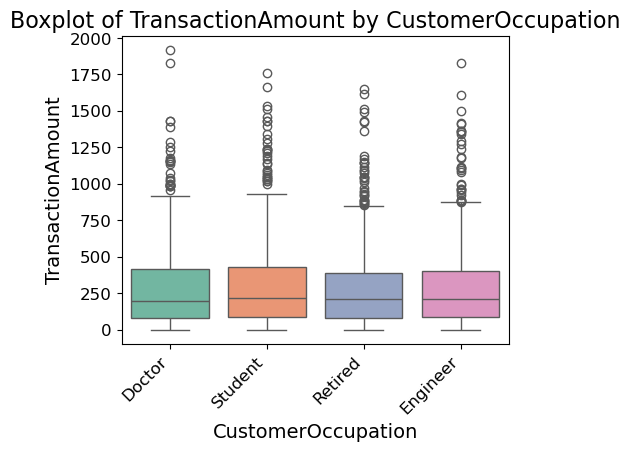

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


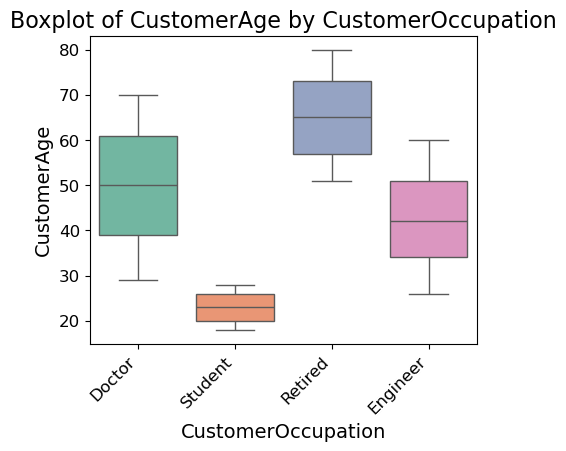

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


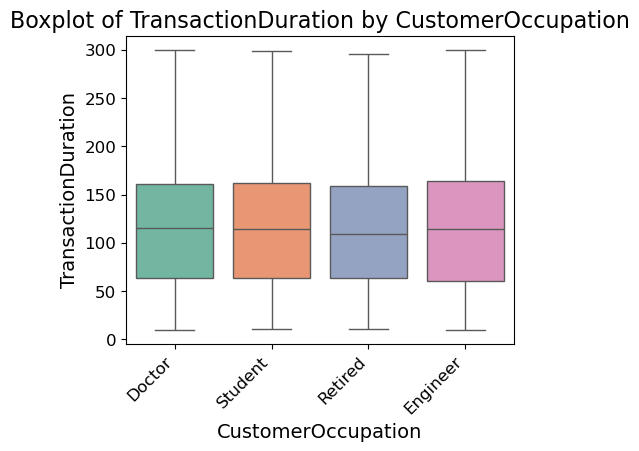

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


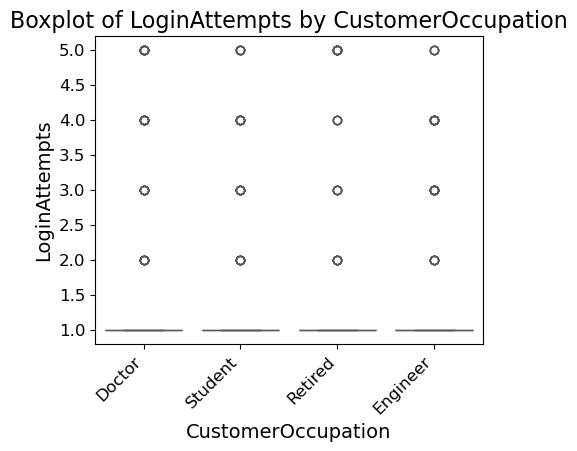

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12572\3815936910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')


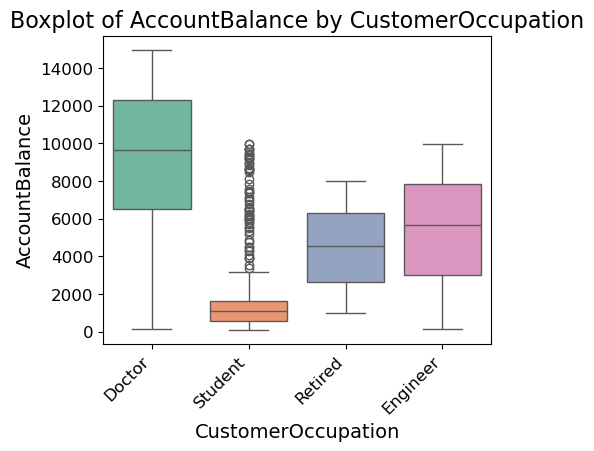

In [64]:
# 3. Boxplot for Numeric vs Categorical
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(5, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')
        plt.title(f'Boxplot of {num_col} by {cat_col}', fontsize=16)
        plt.xlabel(cat_col, fontsize=14)
        plt.ylabel(num_col, fontsize=14)
        plt.xticks(rotation=45, fontsize=12, ha='right')
        plt.yticks(fontsize=12)
        plt.show()

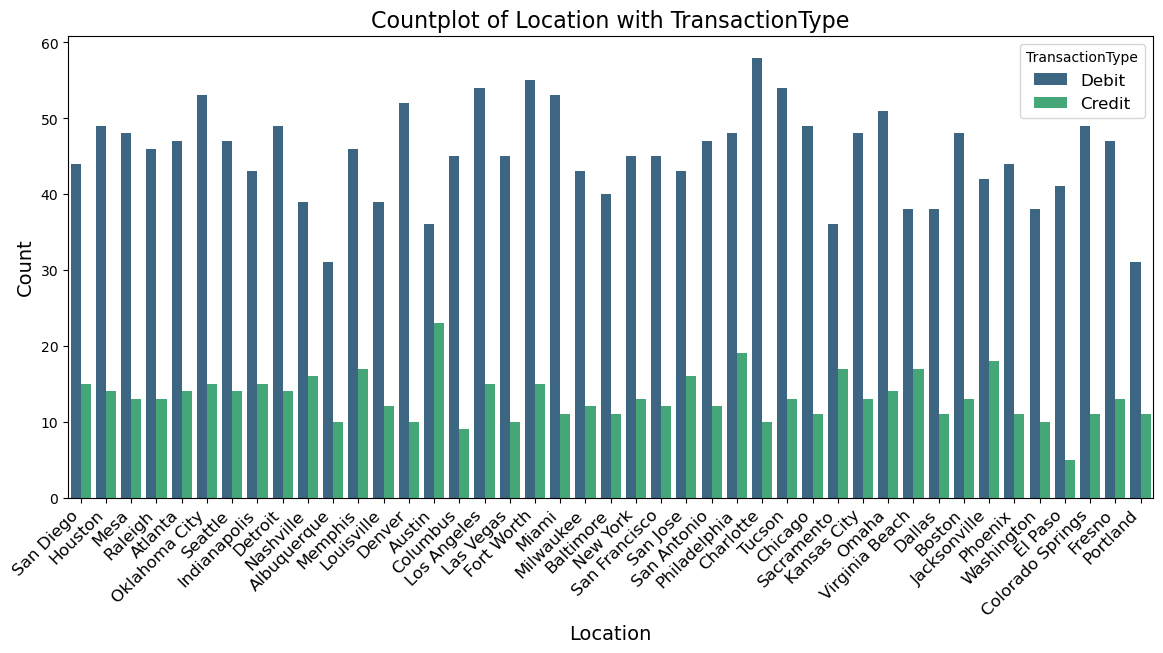

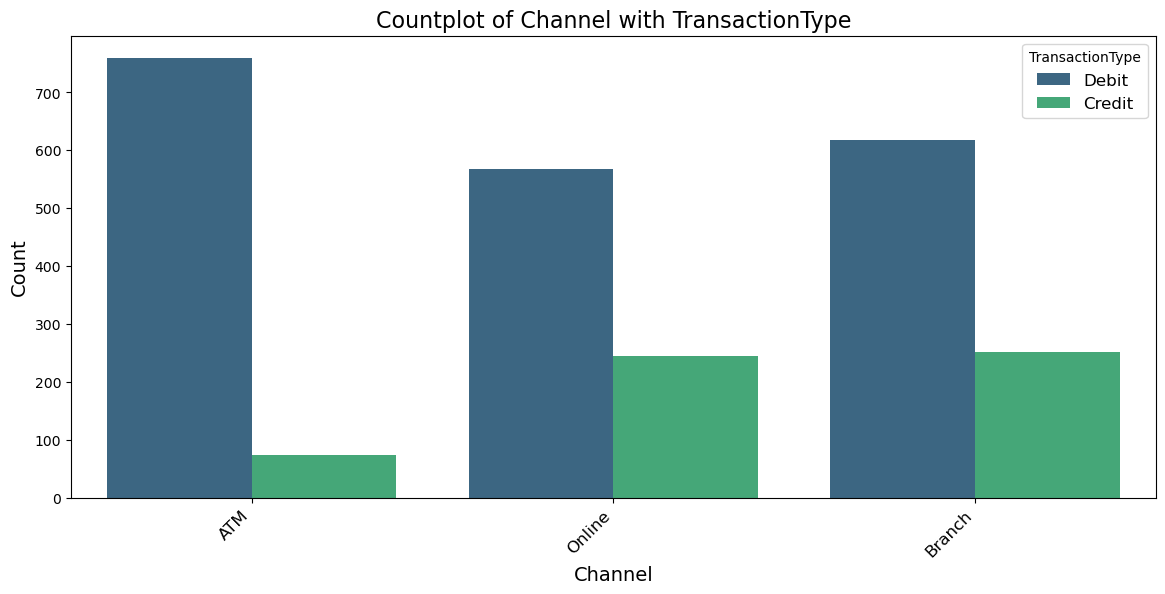

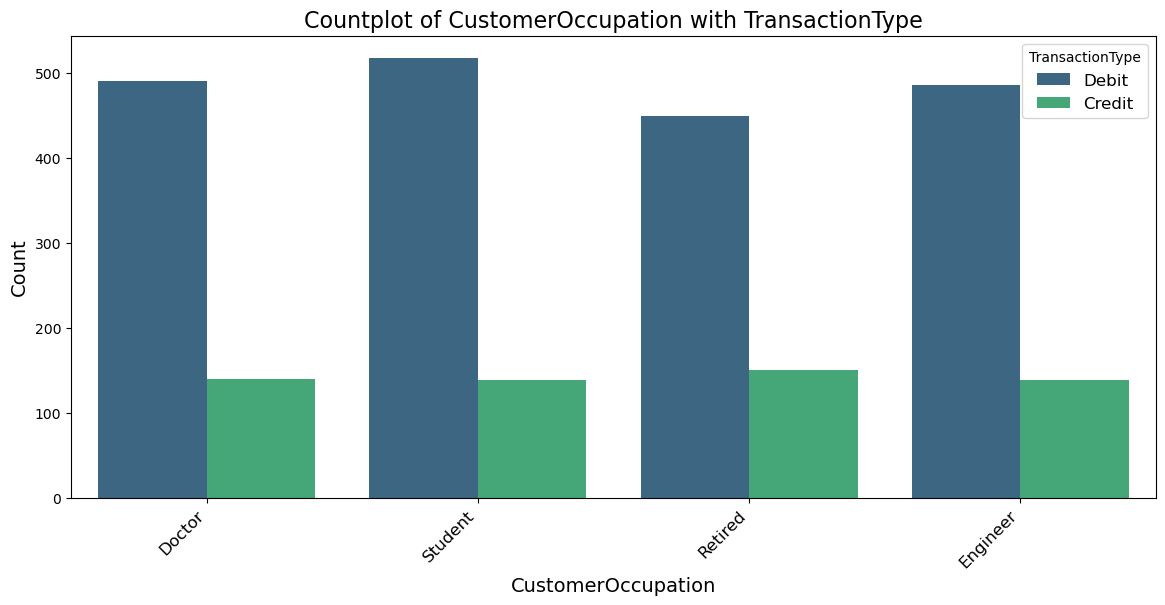

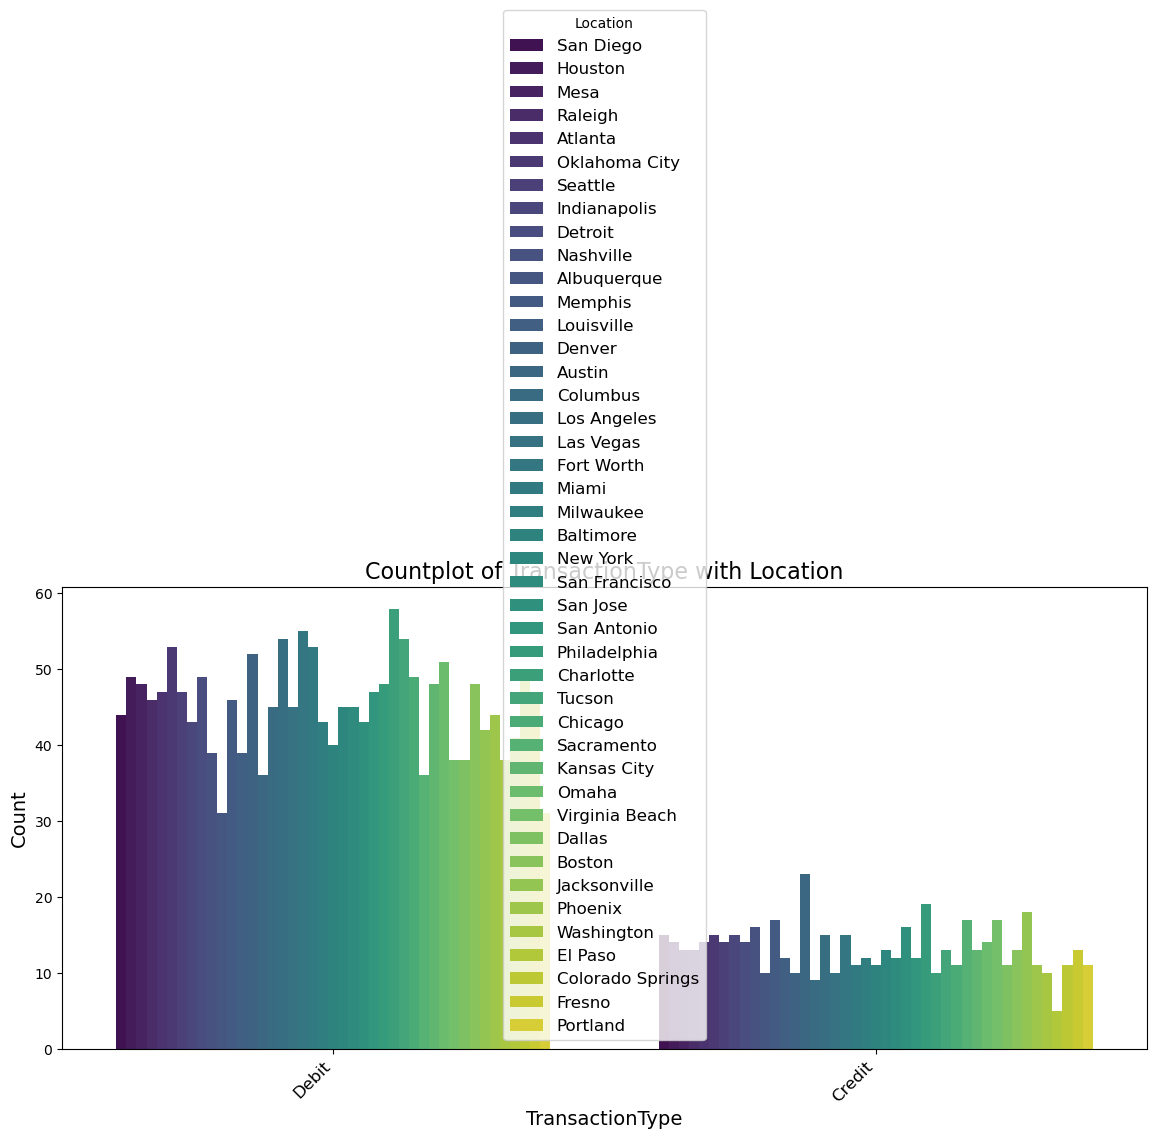

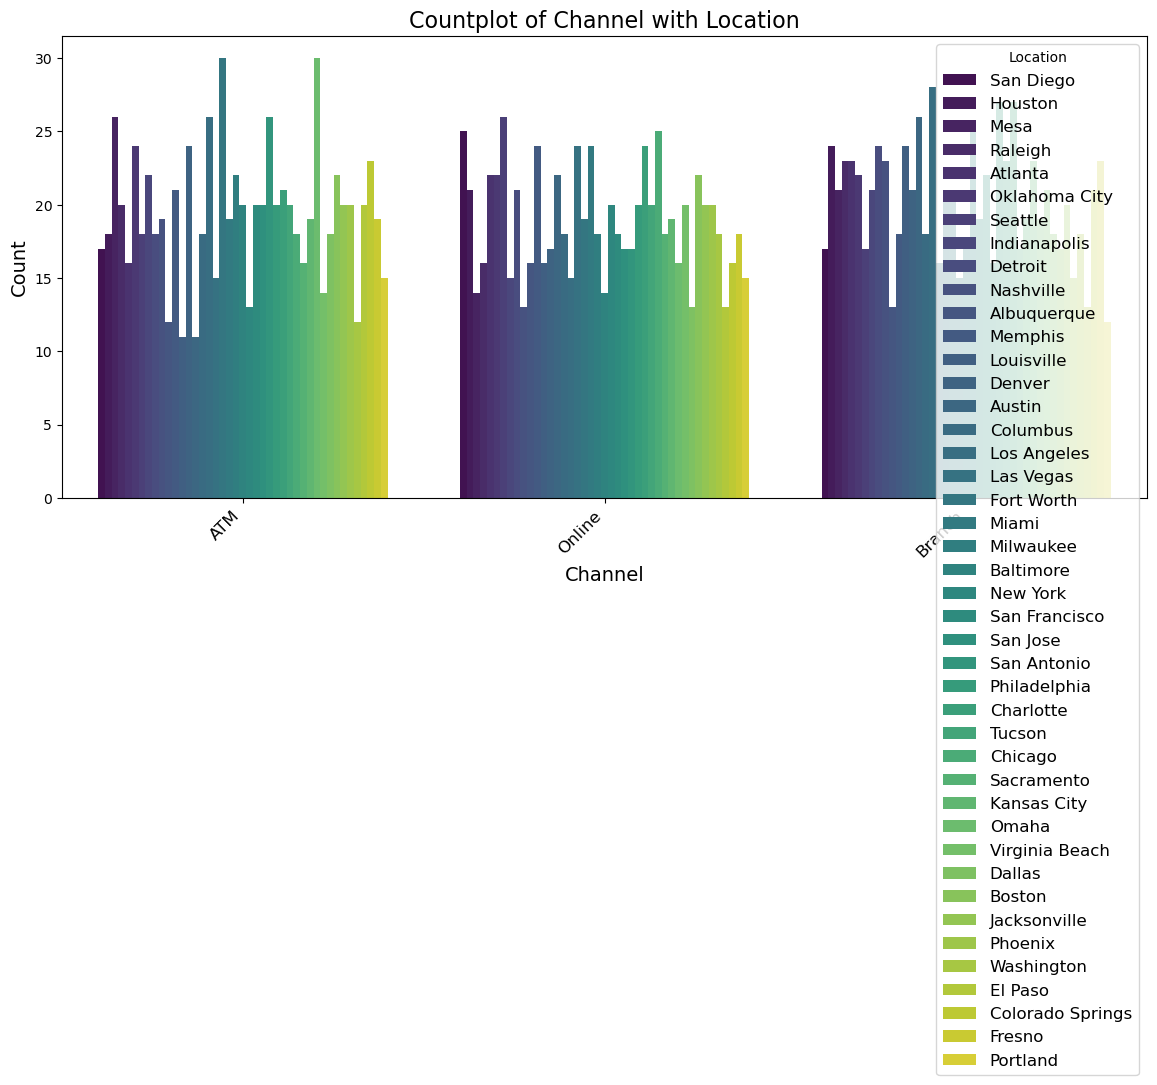

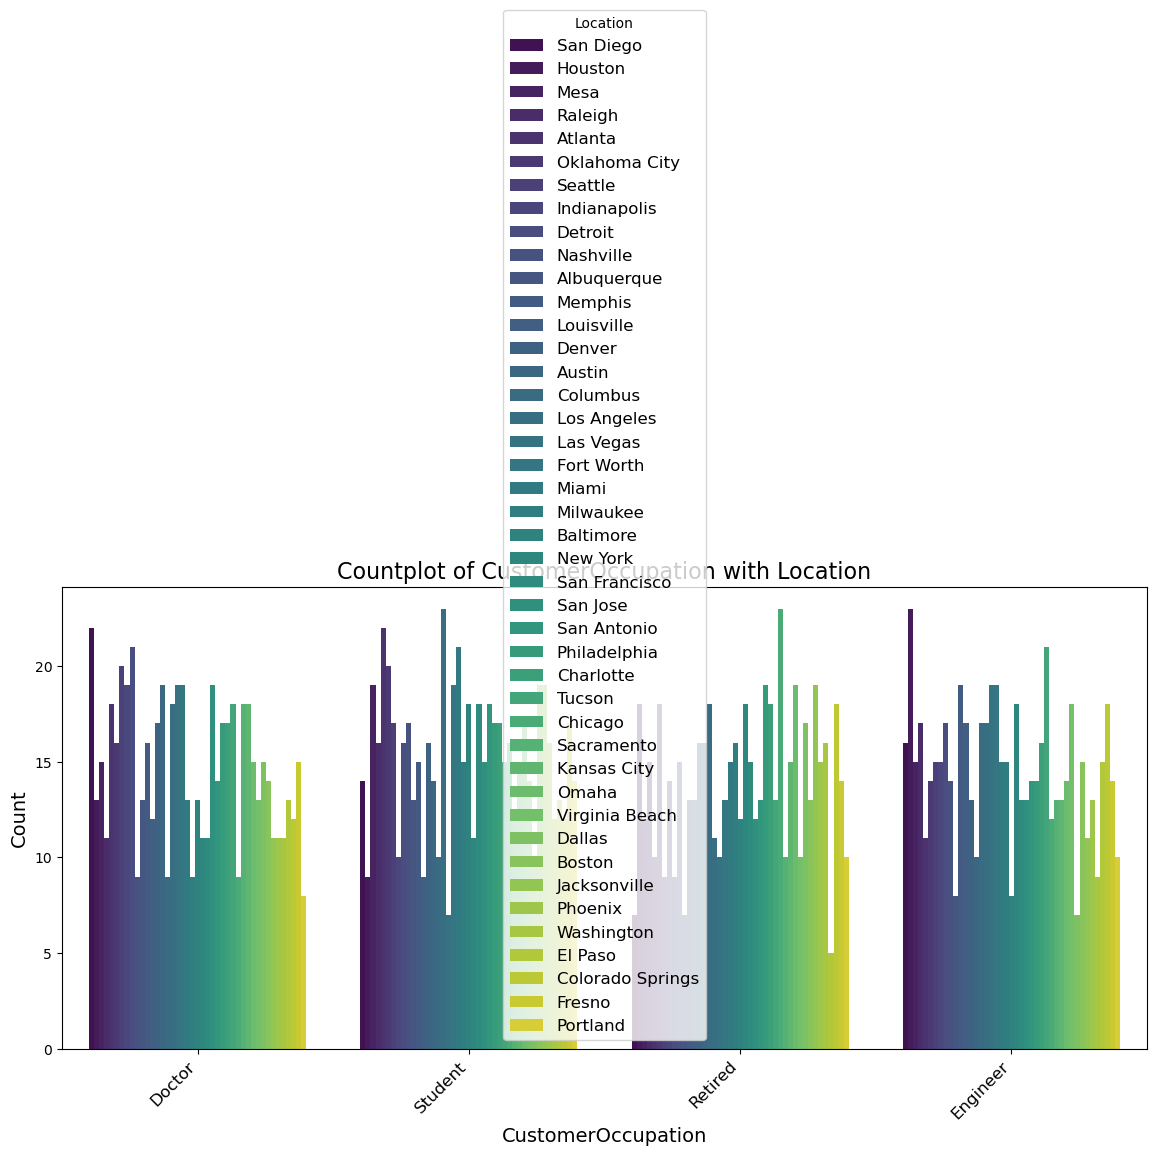

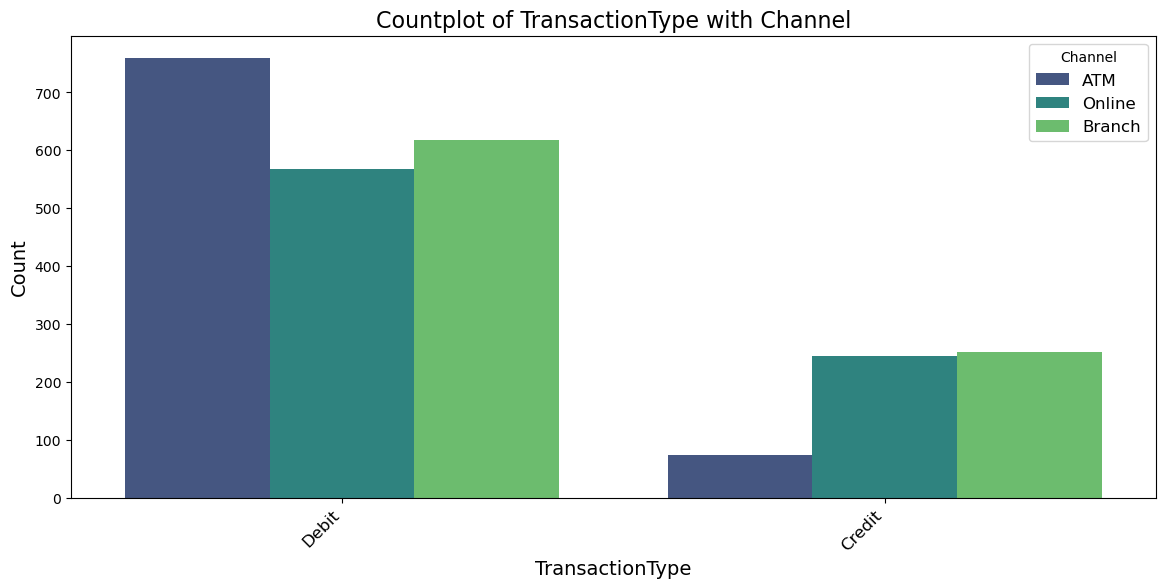

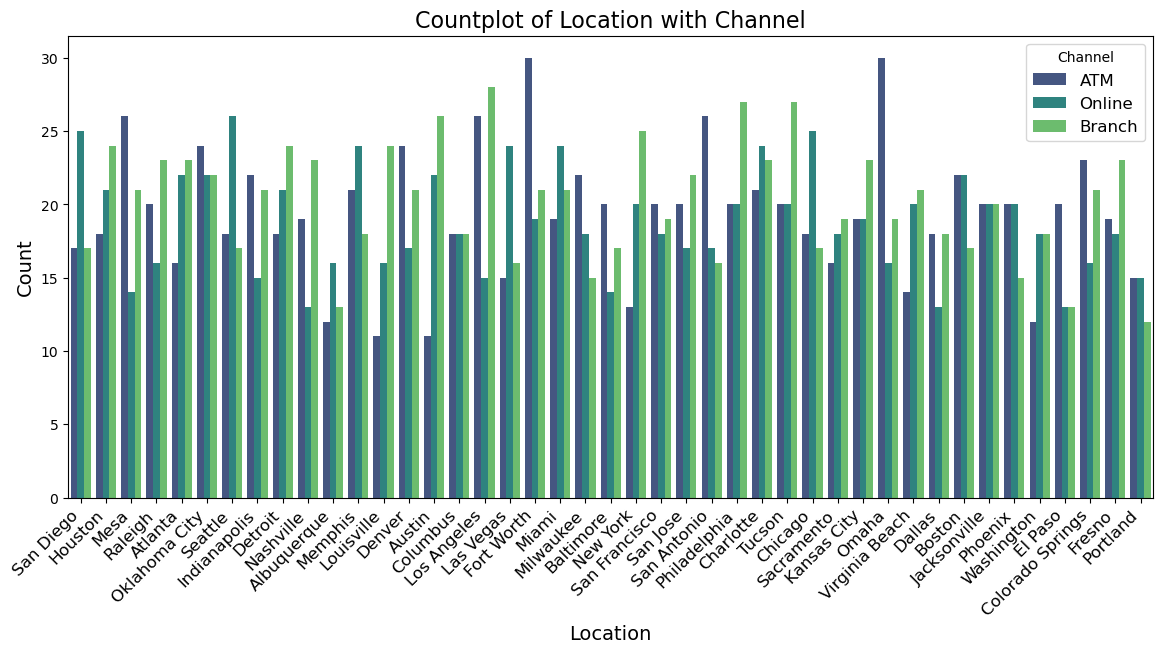

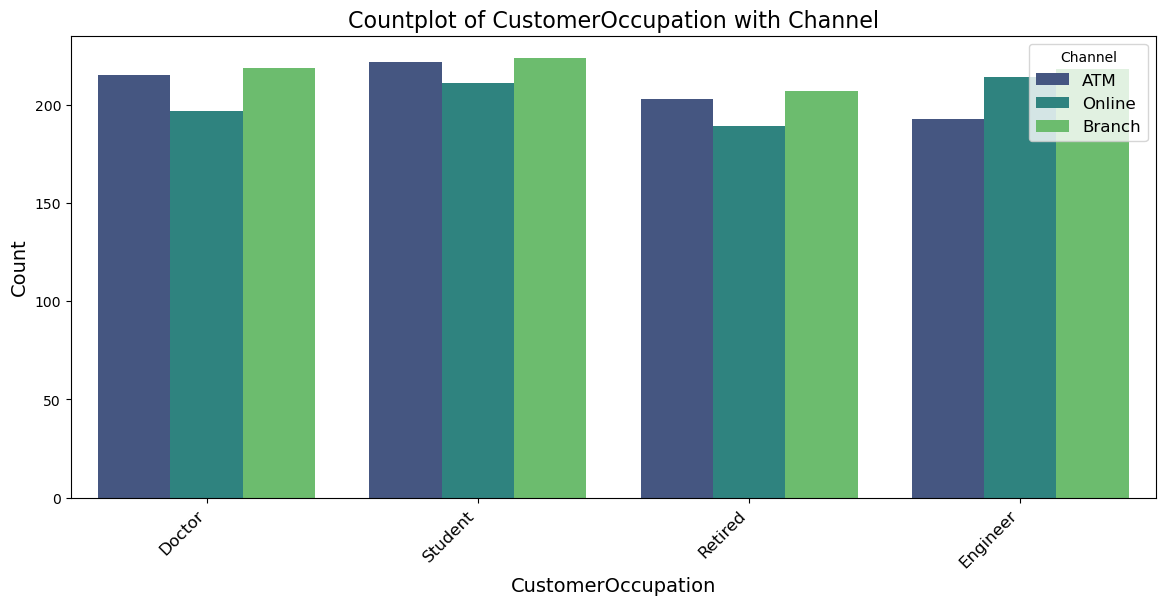

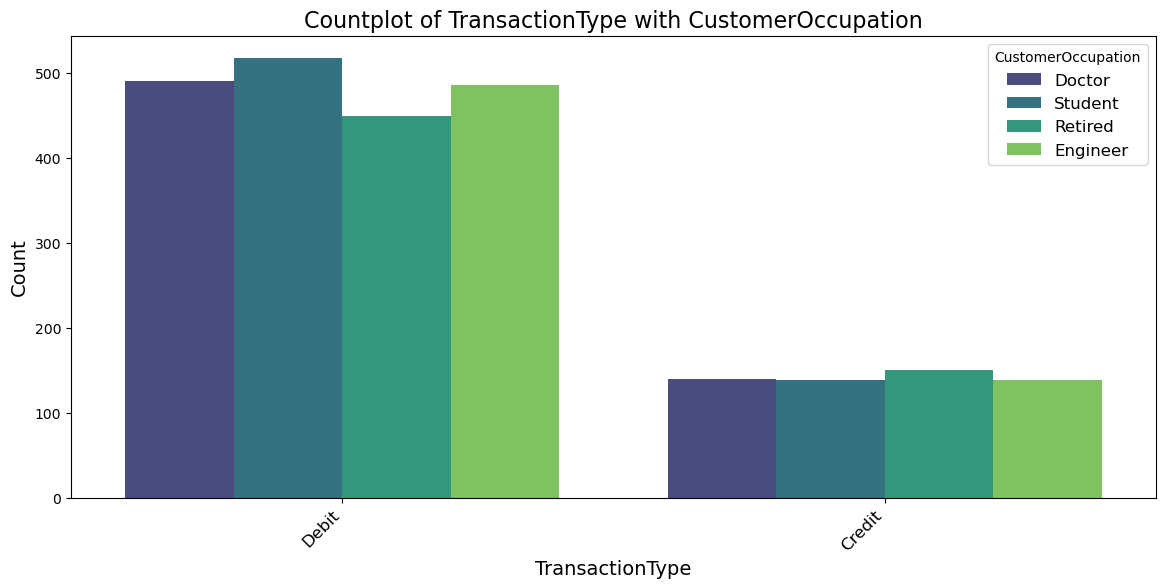

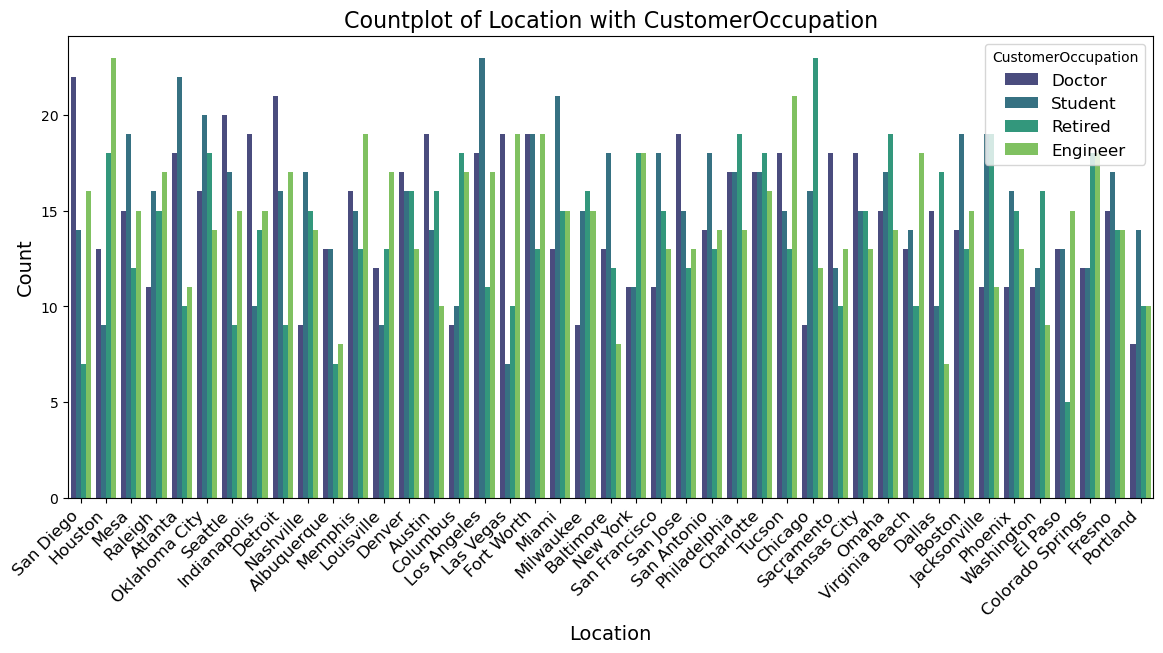

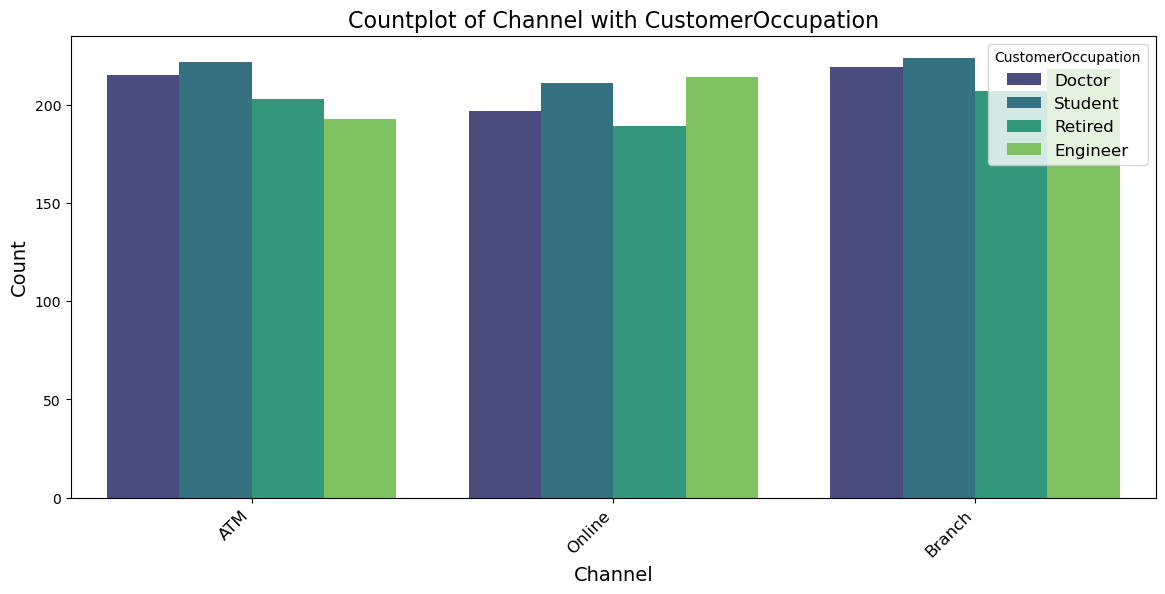

In [65]:
# 4. Countplot with Hue for Categorical vs Categorical
for cat1 in categorical_cols:
    for cat2 in categorical_cols:
        if cat1 != cat2:  # Avoid self-comparison
            plt.figure(figsize=(14, 6))
            sns.countplot(x=cat2, hue=cat1, data=df, palette='viridis')
            plt.title(f'Countplot of {cat2} with {cat1}', fontsize=16)
            plt.xlabel(cat2, fontsize=14)
            plt.ylabel('Count', fontsize=14)
            plt.xticks(rotation=45, fontsize=12, ha='right')
            plt.legend(title=cat1, fontsize=12)
            plt.show()

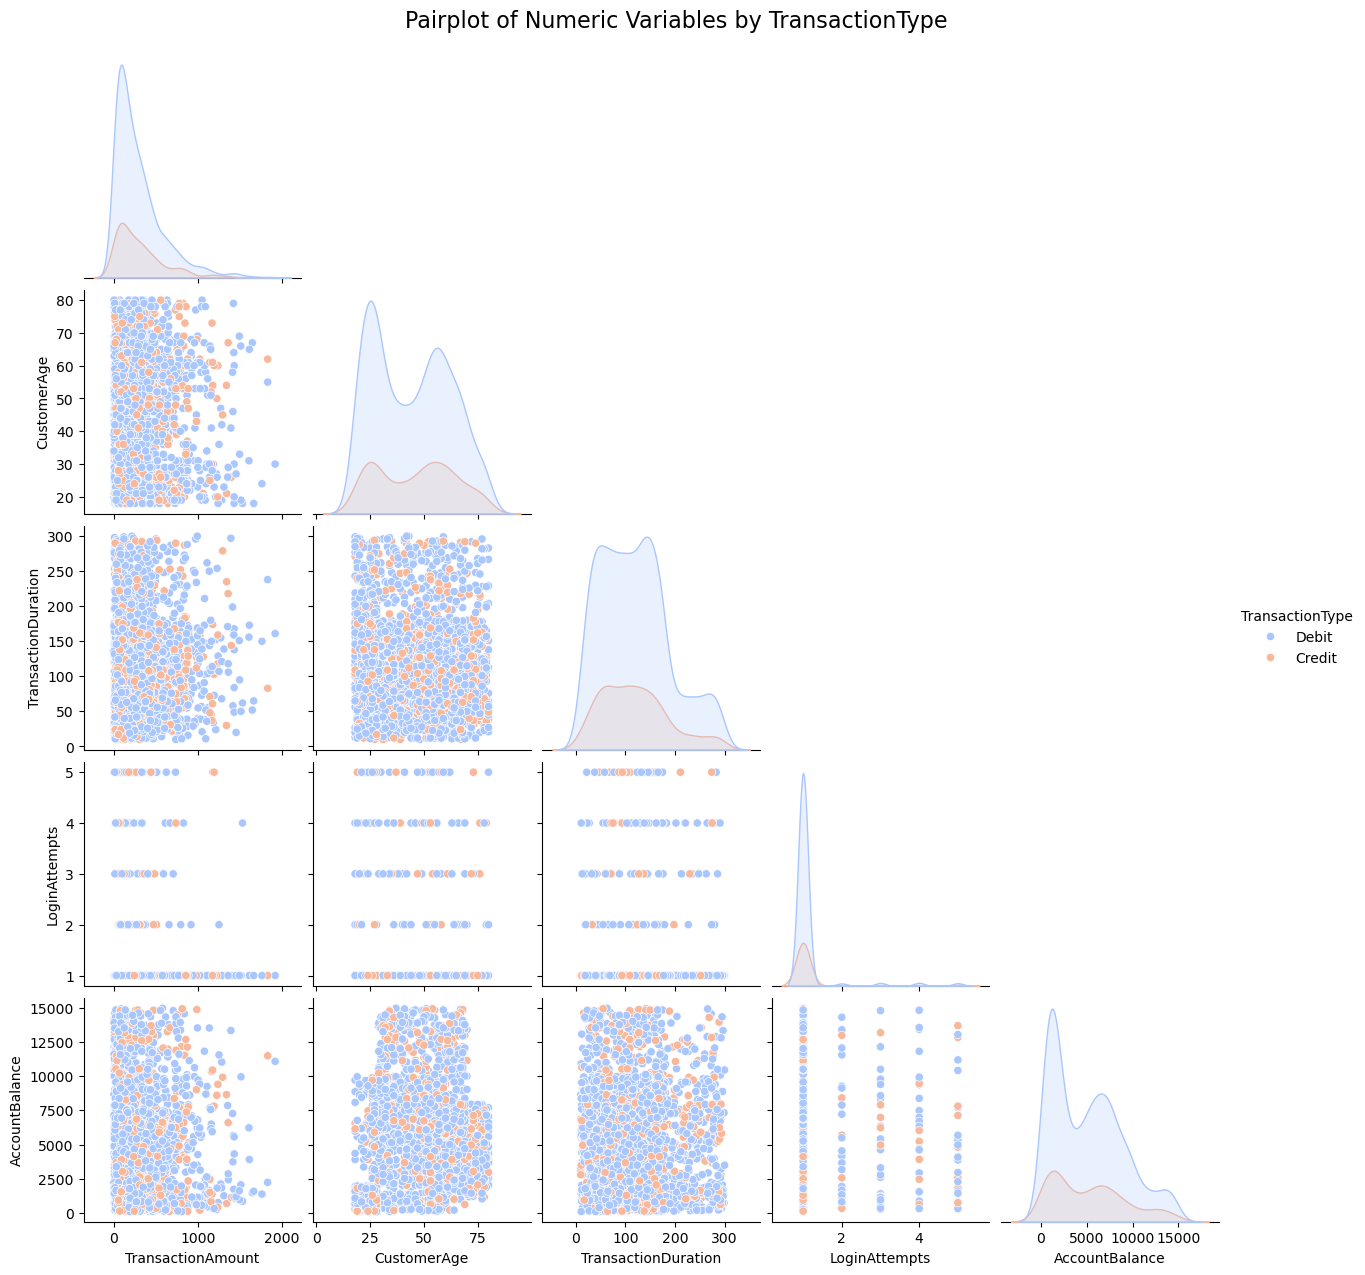

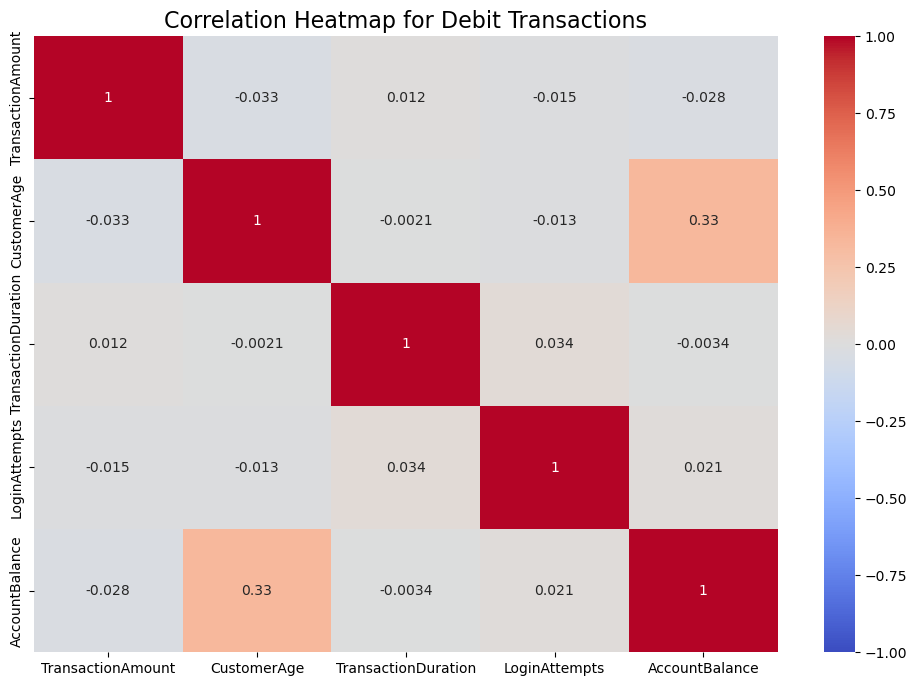

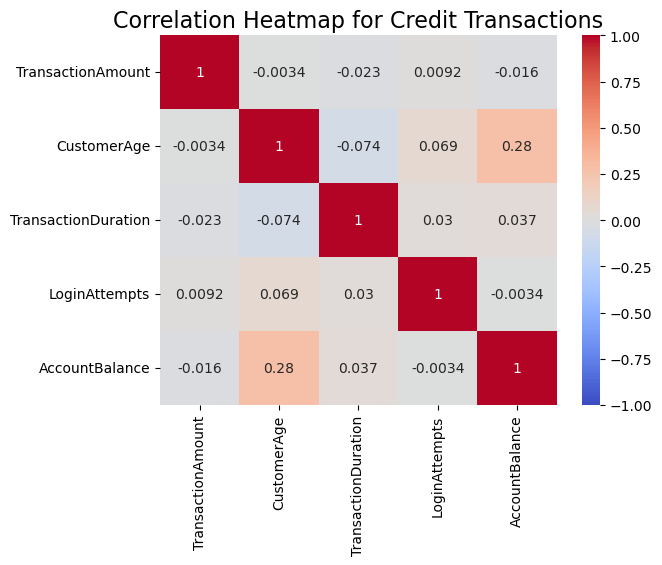

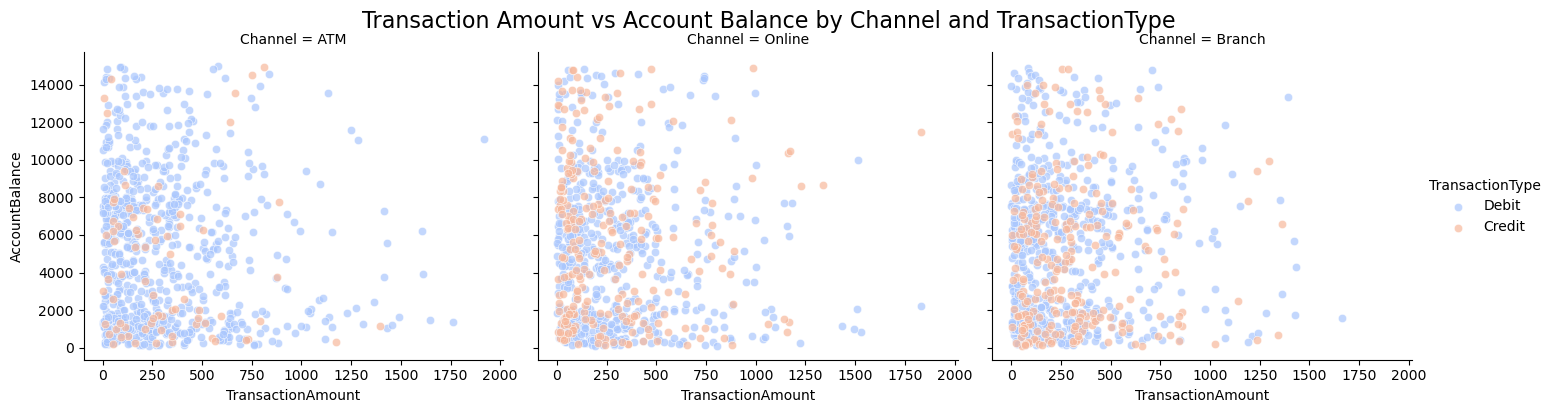

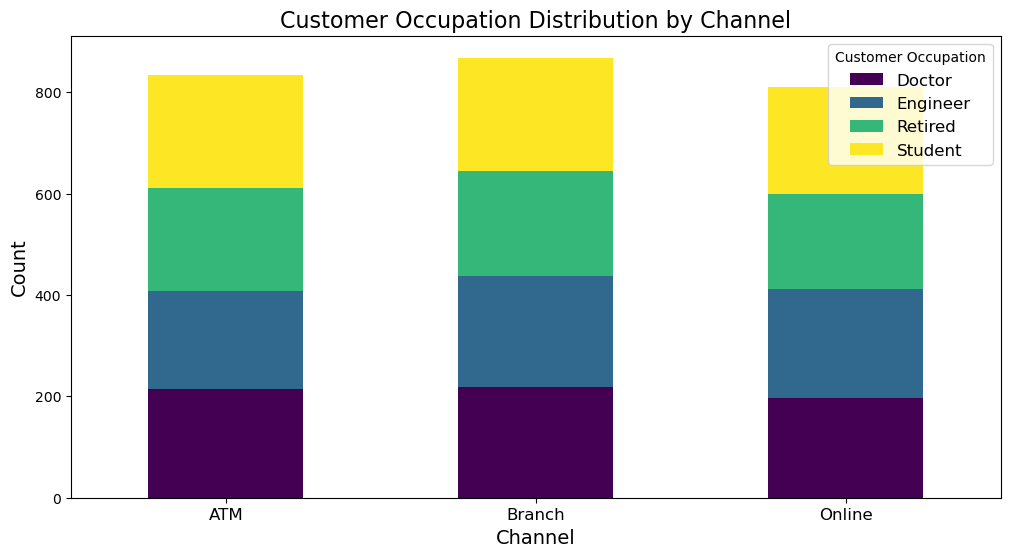

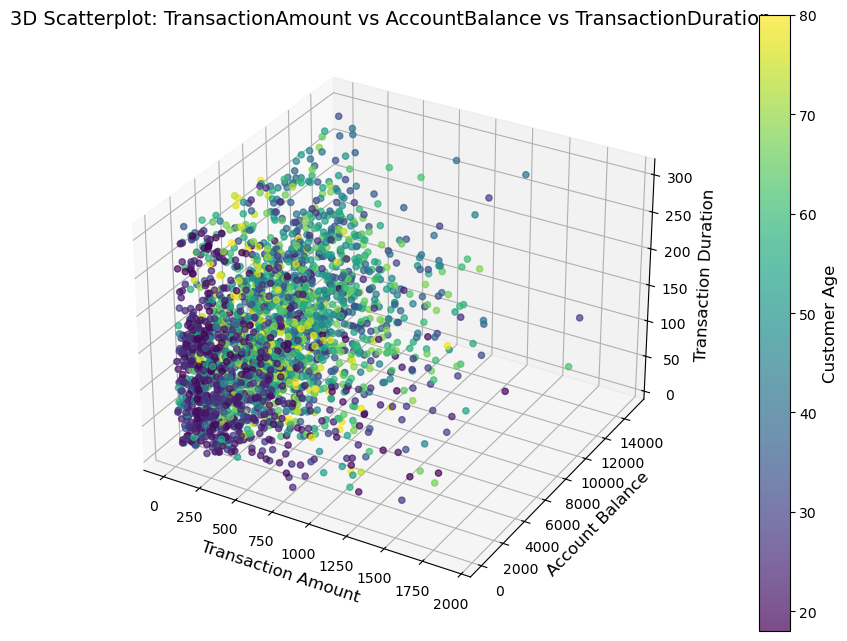

In [66]:
# 1. Multivariate Pairplot (Numeric variables colored by a categorical variable)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df, vars=numeric_cols, hue='TransactionType', palette='coolwarm', corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables by TransactionType', fontsize=16, y=1.02)
plt.show()

# 2. Heatmap of Numeric Correlations grouped by a Categorical Variable
plt.figure(figsize=(12, 8))
for trans_type in df['TransactionType'].unique():
    subset = df[df['TransactionType'] == trans_type]
    plt.title(f'Correlation Heatmap for {trans_type} Transactions', fontsize=16)
    sns.heatmap(subset[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.show()


# 3. FacetGrid: Scatterplot of Transaction Amount vs Account Balance by Channel
g = sns.FacetGrid(df, col="Channel", hue="TransactionType", palette="coolwarm", height=4, aspect=1.2)
g.map(sns.scatterplot, "TransactionAmount", "AccountBalance", alpha=0.7)
g.add_legend()
g.fig.suptitle('Transaction Amount vs Account Balance by Channel and TransactionType', fontsize=16, y=1.02)
plt.show()

# 4. Stacked Bar Chart: Customer Occupation Distribution by Channel
occupation_channel = df.groupby(['Channel', 'CustomerOccupation']).size().unstack()
occupation_channel.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Customer Occupation Distribution by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Customer Occupation', fontsize=12)
plt.show()

# 5. 3D Scatterplot: Visualize three numeric variables

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['TransactionAmount'], 
    df['AccountBalance'], 
    df['TransactionDuration'], 
    c=df['CustomerAge'], 
    cmap='viridis', 
    alpha=0.7
)
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Account Balance', fontsize=12)
ax.set_zlabel('Transaction Duration', fontsize=12)
plt.title('3D Scatterplot: TransactionAmount vs AccountBalance vs TransactionDuration', fontsize=14)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Customer Age', fontsize=12)
plt.show()

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [69]:
# Preprocessing: Handle datetime columns
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

# Identify numeric and categorical columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Normalize numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))

# Combine preprocessed data
processed_data = pd.concat([numeric_scaled, categorical_encoded], axis=1)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df[numeric_cols].describe())

# Initialize Fraud column
df['Fraud'] = False

Descriptive Statistics:
       TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
count        2512.000000          2512.000000    2512.000000     2512.000000   
mean          297.593778           119.643312       1.124602     5114.302966   
std           291.946243            69.963757       0.602662     3900.942499   
min             0.260000            10.000000       1.000000      101.250000   
25%            81.885000            63.000000       1.000000     1504.370000   
50%           211.140000           112.500000       1.000000     4735.510000   
75%           414.527500           161.000000       1.000000     7678.820000   
max          1919.110000           300.000000       5.000000    14977.990000   

       CustomerAge  TimeSinceLastTransaction  
count  2512.000000              2.512000e+03  
mean     44.673965             -4.211863e+07  
std      17.792198              9.191205e+06  
min      18.000000             -5.803267e+07  
25%      27.000000  